# Visualizing the late 1990's steroid abuse in Baseball 
#### From "The Cream" (Testosterone-Epitestosterone Cream)ects & "The Clear" (THG, Tetrahydrogestrinone, Norbolethone) to "designer" drugs.

Adriana Moscatelli - June, 2017

### Introduction

The following data analysis report presents a visualization of data relating to the steroid abuse practice in baseball. As it was highlighted in the Mitchell report, steroid and any other substance abuse poses health risks to the players, it gives an unfair advantage to those who consume the substances compared to those who don't, it does not adhere to the fair rules of the game and it provides a negative role model for young athletes who see the abuse of substances as an accepted practice they should adhere to even though it is illegal and it poses severe health risks.

<i>"The Major League Baseball’s Joint Drug Prevention and Treatment Program was added to the Basic
Agreement in 2002. Under that program, testing has been conducted of players in Major League Baseball since 2003, first in the form of anonymous survey testing in 2003, and thereafter in mandatory random testing, that now carries with it severe penalties for violations.</i>

Source: The Mitchell report, December 13, 2007 (http://files.mlb.com/mitchrpt.pdf)

### Key Dates

1994: Commissioner Selig and the club owners proposed a drug program that would have included some forms of testing and would have listed steroids among baseball’s prohibited substances. The Players Association did not agree to the proposal.

2001: The Commissioner had unilaterally implemented drug testing throughout baseball’s affiliated minor leagues.

2002: Commissioner's proposal to the Players Association for a major league drug testing program. The program provided for the possibility of mandatory random drug testing of all major league players if more than 5% of players tested positive for steroids during anonymous survey testing in 2003.

2004: Mandatory random drug testing began in Major League Baseball after that did in fact occur after more than 5% of players tested positive for steroids during anonymous survey testing in 2003. That year, there were 12 undisputed positive tests for steroids.

2005: Human growth hormone (along with seventeen other compounds) was added to the list of prohibited substances. 
The Players Association agreed to more stringent penalties for a positive test for steroids (or similar substances) including, for the first time, a suspension of ten days for a player’s first positive test. In 2005, 12 players tested positive for steroids and were suspended for ten days.
Later that year, further revisions were agreed to, including significant increases in penalties: a 50-game suspension for a first positive test; a 100-game suspension for a second positive test; and a permanent suspension for a third positive test.

2006: Two players tested positive for steroids and were suspended for 50 games.

2007: Three players were suspended for 50 games each for positive steroids tests.

Source: The Mitchell report (http://files.mlb.com/summary.pdf)

### Key figures

<img src= "http://d3k2oh6evki4b7.cloudfront.net/req/201706013/images/headshots/3/37e0251c_mlbam.jpg" align="left" style="margin:0px 10px 0px 0px" width="100">
<b>Jose Canseco</b> of the Oakland Athletics was the subject of the first media speculation about his use of steroids, and Boston Red Sox fans taunted him for his alleged steroids use during the 1988 American League Championship Series.

<img src= "http://d3k2oh6evki4b7.cloudfront.net/req/201706013/images/headshots/0/0d30f993_davis.jpg" align="left" align="left" style="margin:0px 10px 0px 0px" width="100">
<b>Ken Caminiti</b> of the San Diego Padres was voted the National League’s Most Valuable Player in 1996, after a dramatic increase in offense throughout Major League Baseball. In a 2002 Sports Illustrated article, he admitted that he had been using steroids that season and credited them for his increased power.

<img src= "http://d3k2oh6evki4b7.cloudfront.net/req/201706013/images/headshots/1/1d5cdccc_davis.jpg" align="left" align="left" style="margin:0px 10px 0px 0px" width="100">
<b>Mark McGwire</b> gained attention in August 1998 when an article reported that he was using the then illegal steroid precursor androstenedione while chasing the single-season home run record.

From 2000 to 2002 players from several teams were caught in possession of bottles of steroids, syringes, diet pills and other drugs.

Source: The Mitchell report (http://files.mlb.com/summary.pdf)

### Objectives

The data visualization below starts by looking at overall trends in Home Runs over the entire history of baseball. For the 3 players who were at the center of the scandal (Canseco, Caminiti and McGwire), we look at career statistics, focusing on number of home runs, hits, doubles and triples. We compare player statistics to other top players who were also active during the 90s and have also been reported to use Performance Enhancing Substances PES (per the Mitchell report and other sources listed in the reference section)<sup>1</sup>. We also examine statistics of players in the 60s and players since 2008 (which is well after the enforced testing rules of 2004).
Our goal is to see if there are any patterns or trends that are useful in identifing players who consume Performance Enhancing Substances. One of the challenges in looking at these data is that we don't really know who consumed PES and who didn't. We also can't be sure that players in the 60s did not consume PES. In 1958, the FDA approves the first anabolic steroid for sale in the US<sup>3</sup>. 

In [3322]:
# Setting up the environment.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# The tables have many columns so we need to set the options to be able to see them all.
pd.options.display.max_columns = 48
# Various libraries needed for the matplotlib charts
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.patheffects as PathEffects
# Statistics packages
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

In [2499]:
# These are the tables we care about from the Lahman’s Baseball Database.
master_df = pd.read_csv('Master.csv')
teams_df = pd.read_csv('Teams.csv')
batting_df = pd.read_csv('Batting.csv')
# This is a table with the names and last names of players who have been linked to the use of
# performance enhancing subtances (PES). Names obtained from the Mitchell report.
# New players have been reported since then but we haven't included them in the pes table.
pes_df = pd.read_csv('MR_linked_PES.csv')

In [3174]:
master_df.head(3)

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,NaN,NaN,NaN,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01


In [1666]:
pes_df.head(3)

,nameFirst,nameLast
0,Marvin,Benard
1,Barry,Bonds
2,Bobby,Estalella


We start by taking a look at the most Home Runs in history. Barry Bonds is first with 73. McGwire comes second with 70. Both are listed in the Mitchell report because they used PES. Sammy Sosa is third with 66. Unfortunately he was reported to use steroids as well later (http://www.espn.com/mlb/columns/story?columnist=bryant_howard&id=4264973).

In [3176]:
# Sorting the batting table
sorted_batting_df = batting_df.sort_values(['HR'], ascending=False)
sorted_batting_df.head(5)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
80752,bondsba01,2001,1,SFN,NL,153,476,129,156,32,2,73,137.0,13.0,3.0,177,93.0,35.0,9.0,0.0,2.0,5.0
77389,mcgwima01,1998,1,SLN,NL,155,509,130,152,21,0,70,147.0,1.0,0.0,162,155.0,28.0,6.0,0.0,4.0,8.0
77736,sosasa01,1998,1,CHN,NL,159,643,134,198,20,0,66,158.0,18.0,9.0,73,171.0,14.0,1.0,0.0,5.0,20.0
78705,mcgwima01,1999,1,SLN,NL,153,521,118,145,21,1,65,147.0,0.0,0.0,133,141.0,21.0,2.0,0.0,5.0,12.0
81770,sosasa01,2001,1,CHN,NL,160,577,146,189,34,5,64,160.0,0.0,2.0,116,153.0,37.0,6.0,0.0,12.0,6.0


We are interested in seeing the average, median, min and max for all players each year. We observe that the average HR has a maximum value of 4.6. Most players have an average of zero HR. We will visualize this later in this report. The years 2000, 1997, 1987 and 2001 are at the top of the list. These are years within the height of the steroid period.

In [2994]:
# Groupping by yearID and playerID.
# Some players switch teams so we need to add up the stats for those players in one year. For all players.
bat_yp = batting_df.groupby(['yearID','playerID'], as_index = False).sum()

# Yearly stats (sum, avg, median, max, min)
bat_y = bat_yp.groupby(['yearID'], as_index=False).sum()
bat_y_avg = bat_yp.groupby(['yearID'], as_index=False).mean()
bat_y_med = bat_yp.groupby(['yearID'], as_index=False).median()
bat_y_max = bat_yp.groupby(['yearID'], as_index=False).max()
bat_y_min = bat_yp.groupby(['yearID'], as_index=False).min()

bat_y_avg.sort_values(['HR'], ascending=False).head(5)

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
129,2000,1.260976,55.947154,136.008130,20.301626,36.785366,7.236585,0.773984,4.628455,19.296748,2.377236,1.075610,14.826829,25.492683,0.983740,1.278862,1.323577,1.230894,3.164228
128,1999,1.152192,56.750207,138.243176,20.422663,37.491315,7.229115,0.770058,4.572374,19.405294,2.829611,1.256410,14.798180,25.739454,0.913978,1.306038,1.327543,1.210918,3.173697
116,1987,1.151795,58.770256,147.789744,20.392821,38.866667,6.967179,0.918974,4.572308,19.192821,3.676923,1.568205,14.757949,25.742564,1.320000,0.863590,1.492308,1.138462,3.204103
130,2001,1.198361,56.156557,136.257377,19.015574,35.966393,7.223770,0.760656,4.473770,18.104918,2.543443,1.154098,12.955738,26.560656,1.134426,1.549180,1.317213,1.167213,2.994262
90,1961,1.261290,58.606452,156.503226,20.874194,40.429032,6.411290,1.216129,4.403226,19.454839,1.687097,0.966129,15.962903,24.108065,1.180645,0.924194,2.104839,1.227419,3.600000


We want to focus on the players with the maximum number of Home Runs and we also want to know their max statistics for number of Hits, Doubles and Triples.

In [2573]:
# Getting the start year and final game for each player. Also name and lastname.
debut = master_df[['playerID', 'debut','finalGame', 'nameFirst', 'nameLast']].copy()

#Max for all players (by year and player)
all_max = bat_yp.groupby('playerID', as_index=False)['H', 'HR', '2B', '3B'].max()
all_max_sort = all_max.sort_values(['HR'], ascending=False)

# Adding the first and final games for each player, name and last name.
all_max_year = pd.merge(all_max_sort, debut, on=['playerID'], how='inner')
all_max = all_max_year.sort_values(['HR'], ascending=False)
all_max.columns = ['playerID', 'Hmax', 'HRmax','2Bmax','3Bmax','debut', 
                   'finalGame', 'nameFirst', 'nameLast']

all_max.head(5)

,playerID,Hmax,HRmax,2Bmax,3Bmax,debut,finalGame,nameFirst,nameLast
0,bondsba01,181,73,44,9,1986-05-30,2007-09-26,Barry,Bonds
1,mcgwima01,161,70,28,4,1986-08-22,2001-10-07,Mark,McGwire
2,sosasa01,198,66,38,10,1989-06-16,2007-09-29,Sammy,Sosa
3,marisro01,159,61,34,7,1957-04-16,1968-09-29,Roger,Maris
4,ruthba01,205,60,45,16,1914-07-11,1935-05-30,Babe,Ruth


As shown in the list below, there are not many players with 40 or more Home Runs on a given year. Only 1% of players have reached that number since 1871.

In [2848]:
# Seeing how many players have a high HR max. Not many.
HRmax_counts = all_max.HRmax.value_counts().reset_index()
HRmax_counts.columns = ['HRmax', 'count']
print(HRmax_counts.head())
print(HRmax_counts.tail(10))

# Filtering for players with 40 or more HR max
over_40 = HRmax_counts[HRmax_counts['HRmax'] > 39]
over_40['count'].sum()
over40_ratio = over_40['count'].sum()/len(all_max)
print("")
print ("Ratio of home runs over 40: "+"%.2f" % over40_ratio)

   HRmax  count
0      0  11179
1      1   1968
2      2   1022
3      3    699
4      4    474
    HRmax  count
53     51      3
54     52      3
55     57      2
56     56      2
57     53      1
58     73      1
59     66      1
60     61      1
61     70      1
62     60      1

Ratio of home runs over 40: 0.01


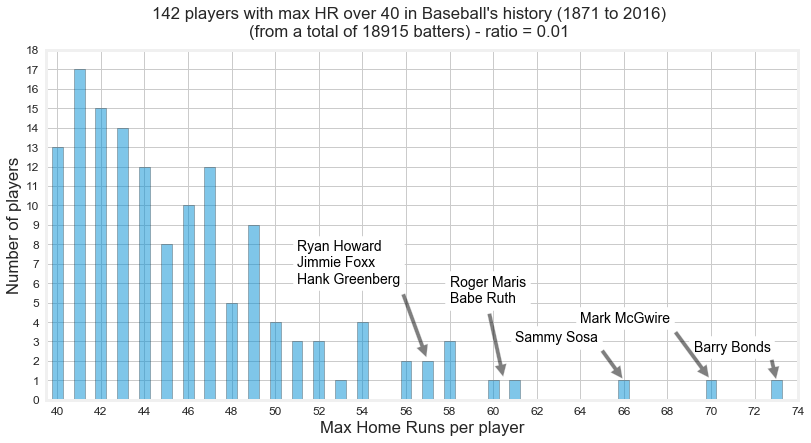

In [2575]:
# Plotting HR max over 40
fig = plt.figure(figsize=(12,6), facecolor='w')
fig.suptitle(str(over_40['count'].sum()) 
             +" players with max HR over 40 in Baseball's history (1871 to 2016)\n" 
             +'(from a total of '+str(len(all_max)) +' batters) - '
             + 'ratio =' +" %.2f" % over40_ratio)
ax = fig.add_subplot(1,1,1,facecolor='w')

ax.bar(HRmax_counts['HRmax'], HRmax_counts['count'], 0.5, align='center', alpha=0.5, edgecolor='k')


ax.annotate(str(all_max['nameFirst'].loc[0] +' ' +str(all_max['nameLast'].loc[0])), 
            xy=(73, 1), xytext=(69.2, 2.5), 
            color='k', size=14, style='normal', backgroundcolor='w',
            arrowprops=dict(facecolor='k', alpha=0.5, shrink=0.05))


ax.annotate(str(all_max['nameFirst'].loc[1] +' ' +str(all_max['nameLast'].loc[1])), 
            xy=(70, 1), xytext=(64, 4), 
            color='k', size=14, style='normal', backgroundcolor='w',
            arrowprops=dict(facecolor='k', alpha=0.5, shrink=0.05))

ax.annotate(str(all_max['nameFirst'].loc[2] +' ' +str(all_max['nameLast'].loc[2])), 
            xy=(66, 1), xytext=(61, 3), 
            color='k', size=14, style='normal', backgroundcolor='w',
            arrowprops=dict(facecolor='k', alpha=0.5, shrink=0.05))

ax.annotate(str(all_max['nameFirst'].loc[3] +' ' +str(all_max['nameLast'].loc[3]))
               +'\n'
               +(all_max['nameFirst'].loc[4] +' ' +str(all_max['nameLast'].loc[4])), 
            xy=(60.5, 1), xytext=(58, 5), 
            color='k', size=14, style='normal', backgroundcolor='w',
            arrowprops=dict(facecolor='k', alpha=0.5, shrink=0.05))

ax.annotate(str(all_max['nameFirst'].loc[5] +' ' +str(all_max['nameLast'].loc[5]))
               +'\n'
               +(all_max['nameFirst'].loc[6] +' ' +str(all_max['nameLast'].loc[6]))
               +'\n'
               +(all_max['nameFirst'].loc[7] +' ' +str(all_max['nameLast'].loc[7])), 
            xy=(57, 2), xytext=(51, 6), 
            color='k', size=14, style='normal', backgroundcolor='w',
            arrowprops=dict(facecolor='k', alpha=0.5, shrink=0.05))

plt.ylim(0, 18)
plt.xlim(39.5,74)
ax.locator_params(nbins=30)

ax.set_xlabel('Max Home Runs per player')
ax.set_ylabel('Number of players')

plt.show()

As shown in the bar chart above, only 142 players (out of a total of 18,915 players) have more than 40 Home Runs on a given year. Barry Bonds, Mark McGwire and Sammy Sosa (all PES users) are the only ones who have hit more than 61 Home Runs on agiven year. Roger Maris hit 61 Home Runs in 1961 and Babe Ruth hit 60 in 1927. We will look into players in the 60s to compare performance. It is interesting to note that 1927 is well before the use of steroids became prevalent in baseball. It is also important to highlight that olympic athlets started using Performance Enhanced Drugs quite ealry:
<i>"In 1904 Olympics marathon runner, Thomas Hicks, was using a mixture of brandy and strychnine [a stimulant that is fatal in high doses] and nearly died. Mixtures of strychnine, heroin, cocaine, and caffeine were used widely by athletes and each coach or team developed its own unique secret formulae. This was common practice until heroin and cocaine became available only by prescription in the 1920s." </i> <sup>3</sup>

We are also interested in seeing how many players have a high yearly HR median because it is a better metric to understand performance for an extended period of time. The list below shows how many players have a median over 15 HR over their career span. The ratio is also low, about 2%.

In [2849]:
# Seeing how many players have a high HR median. Not that many either... 
HRmedian_counts = all_med.HRmedian.value_counts().reset_index()
HRmedian_counts.columns = ['HRmedian', 'count']
print(HRmedian_counts.head())
print(HRmedian_counts.tail(10))

# Filtering for players over 15 HR median
over_15 = HRmedian_counts[HRmedian_counts['HRmedian'] > 14]
over_15['count'].sum()
over15_ratio = over_15['count'].sum()/len(all_med)

print("")
print ("Ratio of home run median over 15: " + "%.2f" % over15_ratio)

   HRmedian  count
0       0.0  13482
1       1.0   1294
2       2.0    661
3       0.5    580
4       3.0    412
    HRmedian  count
64      35.5      2
65      33.0      2
66      35.0      2
67      38.0      2
68      37.0      1
69      30.5      1
70      33.5      1
71      32.5      1
72      36.0      1
73      38.5      1

Ratio of home run median over 15: 0.02


In [2577]:
# Median for all players (by year and player)
all_median = bat_yp.groupby('playerID', as_index=False)['H', 'HR', '2B', '3B'].median()
all_med_sort = all_median.sort_values(['HR'], ascending=False).round(2)

# Adding the first and final games for each player, name and last name.
all_med_year = pd.merge(all_med_sort, debut, on=['playerID'], how='inner')
all_med = all_med_year.sort_values(['HR'], ascending=False)
all_med.columns = ['playerID', 'Hmedian', 'HRmedian','2Bmedian','3Bmedian','debut', 
                   'finalGame', 'nameFirst', 'nameLast']
all_med.head(5)

,playerID,Hmedian,HRmedian,2Bmedian,3Bmedian,debut,finalGame,nameFirst,nameLast
0,kinerra01,153.0,38.5,19.5,4.5,1946-04-16,1955-09-25,Ralph,Kiner
2,dunnad01,126.5,38.0,23.5,0.0,2001-07-20,2014-09-28,Adam,Dunn
1,ruthba01,147.5,38.0,26.0,5.5,1914-07-11,1935-05-30,Babe,Ruth
3,pujolal01,184.0,37.0,38.5,1.0,2001-04-02,2016-09-26,Albert,Pujols
4,mcgwima01,118.0,36.0,19.0,0.0,1986-08-22,2001-10-07,Mark,McGwire


The table above shows that Ralph Kiner (1946-1955), Adam Dunn (2001-2014), Babe Ruth (1914-1935), Albert Pujols (2001-2017) and Mark McGwire (1986-2001) have the highest HR median. McGwire is a confirmed PES user but we have no confirmation of PES use for the other four players. There has been speculation about Dunn and Pujols, which is common for players who played after the steroid era. Unfortunately, after the steroid scandal there will always be a lingering doubt that a player performance is linked to PES use. 

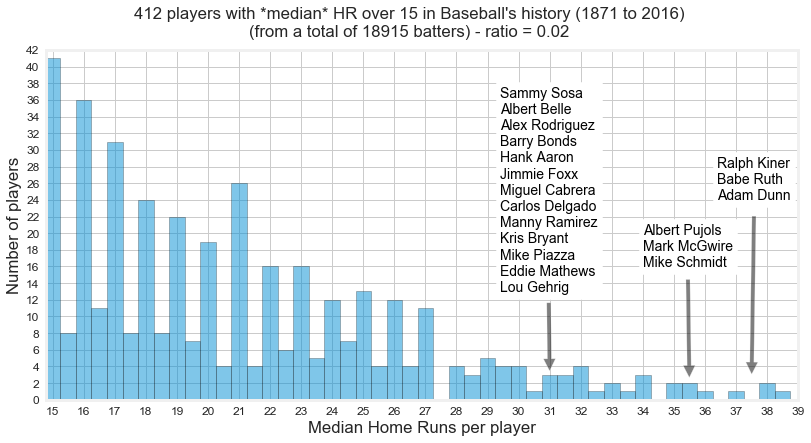

In [2578]:
# Plotting HR median over 15
fig = plt.figure(figsize=(12,6), facecolor='w')
fig.suptitle(str(over_15['count'].sum()) 
             +" players with *median* HR over 15 in Baseball's history (1871 to 2016)\n" 
             +'(from a total of '+str(len(all_med)) +' batters) - '
             + 'ratio =' +" %.2f" % over15_ratio)
ax = fig.add_subplot(1,1,1,facecolor='w')

ax.bar(HRmedian_counts['HRmedian'], HRmedian_counts['count'], 0.5, align='center', alpha=0.5, edgecolor='k')

plt.ylim(0, 42)
plt.xlim(14.8,39)
ax.locator_params(nbins=30)

ax.set_xlabel('Median Home Runs per player')
ax.set_ylabel('Number of players')

ax.annotate(str(all_med['nameFirst'].loc[0] +' ' +str(all_med['nameLast'].loc[0]))
               +'\n'
               +(all_med['nameFirst'].loc[1] +' ' +str(all_med['nameLast'].loc[1]))
               +'\n'
               +(all_med['nameFirst'].loc[2] +' ' +str(all_med['nameLast'].loc[2])), 
            xy=(37.5, 2), xytext=(36.4, 24), 
            color='k', size=14, style='normal', backgroundcolor='w',
            arrowprops=dict(facecolor='k', alpha=0.5, shrink=0.05))

ax.annotate(str(all_med['nameFirst'].loc[3] +' ' +str(all_med['nameLast'].loc[3]))
               +'\n'
               +(all_med['nameFirst'].loc[4] +' ' +str(all_med['nameLast'].loc[4]))
               +'\n'
               +(all_med['nameFirst'].loc[5] +' ' +str(all_med['nameLast'].loc[5])), 
            xy=(35.5, 2), xytext=(34, 16), 
            color='k', size=14, style='normal', backgroundcolor='w',
            arrowprops=dict(facecolor='k', alpha=0.5, shrink=0.05))

ax.annotate(str(all_med['nameFirst'].loc[6] +' ' +str(all_med['nameLast'].loc[6]))
               +'\n'
               +(all_med['nameFirst'].loc[7] +' ' +str(all_med['nameLast'].loc[7]))
               +'\n'
               +(all_med['nameFirst'].loc[8] +' ' +str(all_med['nameLast'].loc[8]))
               +'\n'
               +(all_med['nameFirst'].loc[9] +' ' +str(all_med['nameLast'].loc[9]))
               +'\n'
               +(all_med['nameFirst'].loc[10] +' ' +str(all_med['nameLast'].loc[10]))
               +'\n'
               +(all_med['nameFirst'].loc[11] +' ' +str(all_med['nameLast'].loc[11]))
               +'\n'
               +(all_med['nameFirst'].loc[12] +' ' +str(all_med['nameLast'].loc[12]))
               +'\n'
               +(all_med['nameFirst'].loc[13] +' ' +str(all_med['nameLast'].loc[13]))
               +'\n'
               +(all_med['nameFirst'].loc[14] +' ' +str(all_med['nameLast'].loc[14]))
               +'\n'
               +(all_med['nameFirst'].loc[15] +' ' +str(all_med['nameLast'].loc[15]))
               +'\n'
               +(all_med['nameFirst'].loc[16] +' ' +str(all_med['nameLast'].loc[16]))
               +'\n'
               +(all_med['nameFirst'].loc[17] +' ' +str(all_med['nameLast'].loc[17]))
               +'\n'
               +(all_med['nameFirst'].loc[18] +' ' +str(all_med['nameLast'].loc[18])), 
            xy=(31, 3), xytext=(29.4, 13), 
            color='k', size=14, style='normal', backgroundcolor='w',
            arrowprops=dict(facecolor='k', alpha=0.5, shrink=0.05))



plt.show()

As shown in the chart above, only 412 players have a median over 15 for career Home Runs. Of the top 19 players, 6 players (Mark McGwire, Sammy Sosa, Alex Rodriquez, Barry Bonds, Manny Ramirez, Mike Piazza), 32%, have been confirmed or implicated with the use of PES. <sup> 5 </sup><sup> 6 </sup>

When we look at average HR we find that McGwire is number 5 in the list. The other 3 players are not confirmed PES users.

In [2579]:
# Also the mean for all players (by year and player)
all_avg = bat_yp.groupby('playerID', as_index=False)['H', 'HR', '2B', '3B'].mean()
all_avr_sort = all_avg.sort_values(['HR'], ascending=False).round(2)

# Adding the first and final games for each player, name and last name.
all_avg_year = pd.merge(all_avg_sort, debut, on=['playerID'], how='inner')
all_avg = all_avg_year.sort_values(['HR'], ascending=False)
all_avg.columns = ['playerID', 'Havg', 'HRavg','2Bavg','3Bavg','debut', 
                   'finalGame', 'nameFirst', 'nameLast']

all_avg.head(5)

,playerID,Havg,HRavg,2Bavg,3Bavg,debut,finalGame,nameFirst,nameLast
0,kinerra01,153.0,38.5,19.5,4.5,1946-04-16,1955-09-25,Ralph,Kiner
2,dunnad01,126.5,38.0,23.5,0.0,2001-07-20,2014-09-28,Adam,Dunn
1,ruthba01,147.5,38.0,26.0,5.5,1914-07-11,1935-05-30,Babe,Ruth
3,pujolal01,184.0,37.0,38.5,1.0,2001-04-02,2016-09-26,Albert,Pujols
4,mcgwima01,118.0,36.0,19.0,0.0,1986-08-22,2001-10-07,Mark,McGwire


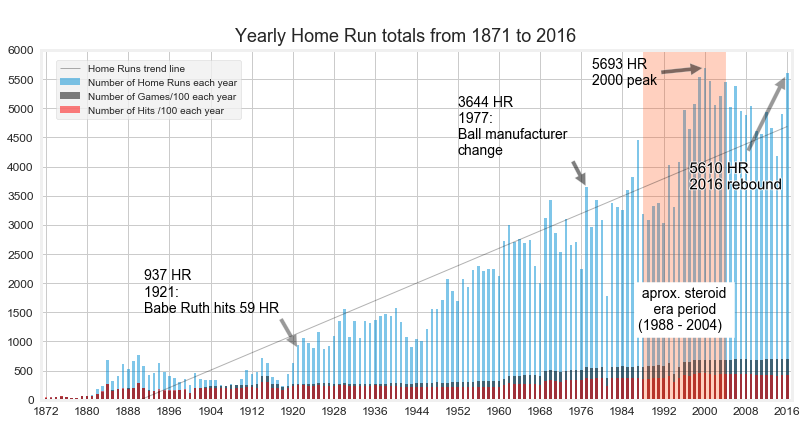

In [3356]:
# Plotting HR yearly totals from 1871 to 2016
majorLocator = MultipleLocator(8)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(1)

fig = plt.figure(figsize=(12,6), facecolor='w')
fig.suptitle('\n Yearly Home Run totals from 1871 to 2016', size=18)
ax = fig.add_subplot(1,1,1,facecolor='w')

ax.bar(bat_y['yearID'], bat_y['HR'], 0.5, align='center', alpha=0.5, label="Number of Home Runs each year")
ax.bar(bat_y['yearID'], bat_y['G']/100, 0.5, align='center', alpha=0.5, facecolor='k',
       label='Number of Games/100 each year')

ax.bar(bat_y['yearID'], bat_y['H']/100, 0.5, align='center', alpha=0.5, facecolor='red',
       label='Number of Hits /100 each year')

# trend line HR
fit = np.polyfit(bat_y['yearID'], bat_y['HR'], deg=1)
ax.plot(bat_y['yearID'], fit[0] * bat_y['yearID'] + fit[1], color='k', linewidth=1, alpha=.3,
       label="Home Runs trend line")

ax.annotate(' aprox. steroid \n    era period \n(1988 - 2004)', xy=(1988, 1200), xytext=(1987, 1200), 
            color='k', size=14, style='normal', backgroundcolor='w')

ax.annotate(str(bat_y[bat_y['yearID'] == 1977]['HR'].values[0]) + ' HR'
            +'\n1977: \nBall manufacturer \nchange', xy=(1977, 3644), xytext=(1952, 4200),
            color='k', size=14, style='normal', arrowprops=dict(facecolor='k', alpha=0.5, shrink=0.05))


ax.annotate(str(bat_y[bat_y['yearID'] == 2000]['HR'].values[0]) + ' HR'
            + '\n2000 peak', xy=(2000, 5693), xytext=(1978, 5400), 
            color='k', size=14, style='normal', arrowprops=dict(facecolor='k', alpha=0.5, shrink=0.05))

ax.annotate(str(bat_y[bat_y['yearID'] == 1921]['HR'].values[0]) + ' HR'
            + '\n1921: \nBabe Ruth hits 59 HR', xy=(1921, 873), xytext=(1891, 1500),
            color='k', size=14, style='normal', arrowprops=dict(facecolor='k', alpha=0.4, shrink=0.05))

txt = ax.text(1997, 3610, (str(bat_y[bat_y['yearID'] == 2016]['HR'].values[0]) + ' HR' + '\n2016 rebound'), 
              size=15, color='k')
txt.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='w', alpha=0.8)])

ax.annotate('', xy=(2016, 5610), xytext=(2008, 4200), fontweight='bold',
            color='k', size=14, style='normal', arrowprops=dict(facecolor='k', alpha=0.4, shrink=0.05))

ax.locator_params(nbins=22)

# The highlight line for steroid era.
plt.axvspan(1988, 2004, color='#FF4500', alpha=0.25)

ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
# for the minor ticks, use no labels; default NullFormatter
ax.xaxis.set_minor_locator(minorLocator)

plt.ylim(0, 6000)
plt.xlim(1871, 2017)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 


plt.legend(bbox_to_anchor=(0.02, 0.97), loc=2, borderaxespad=0., frameon=True)

plt.show()

The chart above shows that the number of total Home Runs per year has climbed steadily. The highest number is in the early 2000s with a peak of 5,693 Home Runs. The "steroid era" spans approximately from the late 80s to the early 2000s. We see a steeper increase in the number of Home Runs during that period. From the mid 2000s to 2014 we see a decrease. Testing for PES was enforced starting in 2004. It is interesting to see that although there was an increase in the number of games played each year and also an increase in the number of hits per year, the home runs trend line is steeper. Also of interest is the Home Runs rebound of 2016. There are theories as to what caused this increase but no conclusive explanation. <sup>7 8 9</sup> Some argue that the use of PES is the cause of the spike, some argue that the statistical models in use are helping with strategy and some say that it is a combination of factors. It'll be interesting to see how the trend evolves over the next 5 years. It would be reasonable to expect the number of Home Runs to decline in comparison with 2000.

<i>"There seems to have been a trend toward more home run hitting in the late 19th century that stalled, for reasons that are not entirely clear... The 1910s saw a modest rise in home run hitting again, driven partly by the momentary appearance of the Federal League, but power hitting was falling out of favor again when Babe Ruth arrived on the scene to change the way home runs were seen forever more."
Christopher Green <sup>10</sup></i>

In [2855]:
print("correlation coeficient:  p-value:*not completely reliable for datasets under 500")
print(stats.stats.pearsonr(bat_y['yearID'], bat_y['HR']))

correlation coeficient:  p-value:*not completely reliable for datasets under 500
(0.94140562054015886, 7.5482882202833304e-70)


There is no question that power hitting has been a trend. The question is what will happen next and what exactly are the causes of the 2016 rebound? Is it sustainable?

In [2881]:
bat_y.tail(3)

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
143,2014,1558,69564,165614,19761,41595,8137,849,4186,18745.0,2764.0,1035.0,14020,37441.0,985.0,1652.0,1343.0,1277.0,3609.0
144,2015,1630,70534,165488,20647,42106,8242,939,4909,19650.0,2505.0,1064.0,14073,37446.0,951.0,1602.0,1200.0,1232.0,3739.0
145,2016,1620,70451,165561,21744,42276,8254,873,5610,20745.0,2537.0,1001.0,15088,38982.0,932.0,1651.0,1025.0,1214.0,3719.0


In [3162]:
# Number of players who hit over 20, 30, 40 and 50 HR per year.
# First we want to sort by year and player.
bat_sort_yp = sorted_batting_df.groupby(['yearID','playerID'], as_index = False).sum()

# Filtering for HR equal or over 10 on bat_sort_yp.
HRover10 = bat_sort_yp[bat_sort_yp['HR'] > 9]
# Counting how many.
over10yearly = HRover10.yearID.value_counts().reset_index()
over10yearly.columns = ['yearID', 'HRcount']

# Filtering for HR equal or over 20 on bat_sort_yp.
HRover20 = bat_sort_yp[bat_sort_yp['HR'] > 19]
# Counting how many.
over20yearly = HRover20.yearID.value_counts().reset_index()
over20yearly.columns = ['yearID', 'HRcount']

# Filtering for HR equal or over 30 on bat_sort_yp.
HRover30 = bat_sort_yp[bat_sort_yp['HR'] > 29]
# Counting how many.
over30yearly = HRover30.yearID.value_counts().reset_index()
over30yearly.columns = ['yearID', 'HRcount']

# Filtering for HR equal or over 40 on bat_sort_yp.
HRover40 = bat_sort_yp[bat_sort_yp['HR'] > 39]
# Counting how many.
over40yearly = HRover40.yearID.value_counts().reset_index()
over40yearly.columns = ['yearID', 'HRcount']

# Filtering for HR equal or over 50 on bat_sort_yp.
HRover50 = bat_sort_yp[bat_sort_yp['HR'] > 49]
# Counting how many.
over50yearly = HRover50.yearID.value_counts().reset_index()
over50yearly.columns = ['yearID', 'HRcount']
over40yearly.head(10)


,yearID,HRcount
0,1996,17
1,2000,16
2,1999,13
3,1998,13
4,2001,12
5,1997,12
6,2006,11
7,2003,10
8,2015,9
9,2005,9


In the table above we see that the total number of players who hit over 40 Home Runs a year was highest in 1996, 2000, 1999, 1998 and 2001. We show more details in the bar chart below.

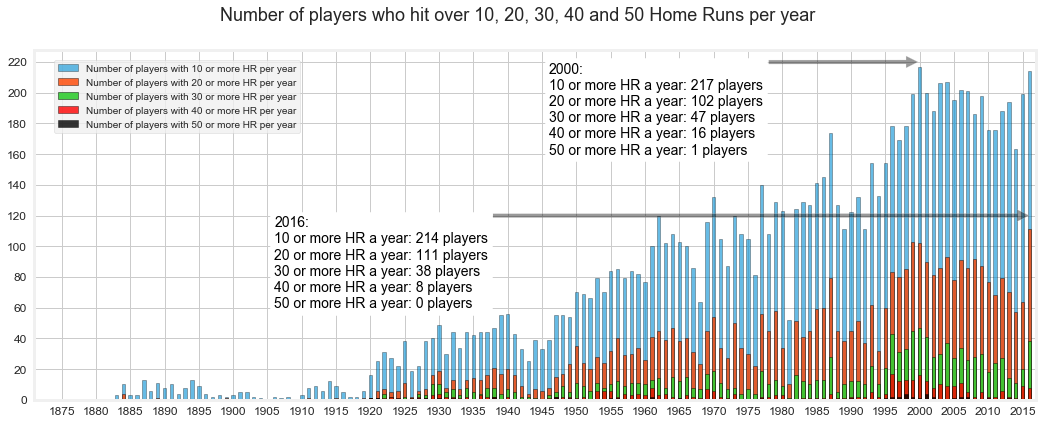

In [3179]:
# Create a barplot fot total number of HR over 10, 20, 30, 40 and 50 each year for the 3 groups
fig = plt.figure(figsize=(16,6), facecolor='w')
fig.suptitle('Number of players who hit over 10, 20, 30, 40 and 50 Home Runs per year', size=18)

ax = fig.add_subplot(1,1,1,facecolor='w')

ax.bar(over10yearly['yearID'], over10yearly['HRcount'], 0.5, align='center', alpha=0.6, edgecolor='k',
      label='Number of players with 10 or more HR per year')

ax.bar(over20yearly['yearID'], over20yearly['HRcount'], 0.5, align='center', alpha=0.8, edgecolor='k',
      color='#FF4500', label='Number of players with 20 or more HR per year')

ax.bar(over30yearly['yearID'], over30yearly['HRcount'], 0.5, align='center', alpha=0.9, edgecolor='k',
      color='#32CD32',label='Number of players with 30 or more HR per year')

ax.bar(over40yearly['yearID'], over40yearly['HRcount'], 0.5, align='center', alpha=0.8, edgecolor='k',
      color='#FF0000', label='Number of players with 40 or more HR per year')

ax.bar(over50yearly['yearID'], over50yearly['HRcount'], 0.5, align='center', alpha=0.8, edgecolor='k', 
       color='k', label='Number of players with 50 or more HR per year')

plt.legend(bbox_to_anchor=(0.02, 0.97), loc=2, borderaxespad=0., frameon=True)
ax.locator_params(nbins=18)


ax.annotate('2000:' +
            '\n'+
            '10 or more HR a year: ' +
            str(over10yearly[over10yearly['yearID'] == 2000]['HRcount'].values[0]) +
            ' players'
            '\n'+
            '20 or more HR a year: ' +
            str(over20yearly[over20yearly['yearID'] == 2000]['HRcount'].values[0]) +
            ' players' +
            '\n'+
            '30 or more HR a year: ' +
            str(over30yearly[over30yearly['yearID'] == 2000]['HRcount'].values[0]) +
            ' players' +
            '\n'+
            '40 or more HR a year: ' +
            str(over40yearly[over40yearly['yearID'] == 2000]['HRcount'].values[0]) +
            ' players' +
            '\n'+
            '50 or more HR a year: ' +
            str(over50yearly[over50yearly['yearID'] == 2000]['HRcount'].values[0]) +
            ' players'
            , xy=(2000, 220), xytext=(1946, 160), backgroundcolor='w',
            color='k', size=14, style='normal', arrowprops=dict(facecolor='k', alpha=0.4, shrink=0.01))

ax.annotate('2016:' +
            '\n'+
            '10 or more HR a year: ' +
            str(over10yearly[over10yearly['yearID'] == 2016]['HRcount'].values[0]) +
            ' players'
            '\n'+
            '20 or more HR a year: ' +
            str(over20yearly[over20yearly['yearID'] == 2016]['HRcount'].values[0]) +
            ' players' +
            '\n'+
            '30 or more HR a year: ' +
            str(over30yearly[over30yearly['yearID'] == 2016]['HRcount'].values[0]) +
            ' players' +
            '\n'+
            '40 or more HR a year: ' +
            str(over40yearly[over40yearly['yearID'] == 2016]['HRcount'].values[0]) +
            ' players' +
            '\n'+
            '50 or more HR a year: ' +

            '0 players'
            , xy=(2016, 120), xytext=(1906, 60), backgroundcolor='w',
            color='k', size=14, style='normal', arrowprops=dict(facecolor='k', alpha=0.4, shrink=0.0005))


majorLocator = MultipleLocator(5)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(1)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
# for the minor ticks, use no labels; default NullFormatter
ax.xaxis.set_minor_locator(minorLocator)
plt.xlim(1871, 2017)
plt.show()

After 2000 we see a decline in the number of players with more than 20, 30, 40 and 50 Home Runs per year. But what explains the rebound of 2016? There are almost as many players hitting 10 Home Runs per year as there were in 2000. There are more players hitting 20 Home Runs a year in 2016 as there were in 2000. On the other hand there are fewer players hitting 30, and 40 Home Runs per year and none hitting 50 Home Runs. In 2000 Sammy Sosa, who is a confirmed PES user, hit exactly 50 Home Runs.

In [2971]:
# We want to compare the number of home runs over 50 during 84/04 to 46/66
over50_84_04 = over50yearly[(over50yearly['yearID'] > 1983) & (over50yearly['yearID'] < 2005)]
over50_46_66 = over50yearly[(over50yearly['yearID'] > 1945) & (over50yearly['yearID'] < 1967)]

# One-way ANOVA using Scipy
# Comparing total number of home runs over 50 per year between two groups: 46 to 66 and 84 to 2004.
print("Home Runs over 50, difference between 1984/2004 and 1946/1966:")
print(stats.f_oneway(over50_84_04['HRcount'], over50_46_66['HRcount']))

Home Runs over 50, difference between 1984/2004 and 1946/1966:
F_onewayResult(statistic=2.316363636363636, pvalue=0.15196594676712999)


When we compare the number of players who hit 50 or more Home Runs per year for the periods of 1946-1966 and 1984-2004 we see that there is no statisticaly significant difference.

In [2969]:
# We want to compare the number of home runs over 40 during 84/04 to 46/66
over40_84_04 = over40yearly[(over40yearly['yearID'] > 1983) & (over40yearly['yearID'] < 2005)]
over40_46_66 = over40yearly[(over40yearly['yearID'] > 1945) & (over40yearly['yearID'] < 1967)]

# One-way ANOVA using Scipy
# Comparing total number of home runs over 40 per year between two groups: 46 to 66 and 84 to 2004.
print("Home Runs over 40, difference between 1984/2004 and 1946/1966:")
print(stats.f_oneway(over40_84_04['HRcount'], over40_46_66['HRcount']))

Home Runs over 40, difference between 1984/2004 and 1946/1966:
F_onewayResult(statistic=6.0705358274493717, pvalue=0.018260084289819518)


Comparing the number of players who hit 40 or more Home Runs per year for the periods of 1946-1966 and 1984-2004 we find thet there is a statistically significant difference at p < 0.05

In [2972]:
# We want to compare the number of home runs over 30 during 84/04 to 46/66
over30_84_04 = over30yearly[(over30yearly['yearID'] > 1983) & (over30yearly['yearID'] < 2005)]
over30_46_66 = over30yearly[(over30yearly['yearID'] > 1945) & (over30yearly['yearID'] < 1967)]

# One-way ANOVA using Scipy
# Comparing total number of home runs over 30 per year between two groups: 46 to 66 and 84 to 2004.
print("Home Runs over 30, difference between 1984/2004 and 1946/1966:")
print(stats.f_oneway(over30_84_04['HRcount'], over30_46_66['HRcount']))

Home Runs over 30, difference between 1984/2004 and 1946/1966:
F_onewayResult(statistic=21.177508269018741, pvalue=4.1699873614829602e-05)


Comparing the number of players who hit 30 or more Home Runs per year for the periods of 1946-1966 and 1984-2004 we find thet there is a statistically significant difference at p < 0.001

In [2973]:
# We want to compare the number of home runs over 20 during 84/04 to 46/66
over20_84_04 = over20yearly[(over20yearly['yearID'] > 1983) & (over20yearly['yearID'] < 2005)]
over20_46_66 = over20yearly[(over20yearly['yearID'] > 1945) & (over20yearly['yearID'] < 1967)]

# One-way ANOVA using Scipy
# Comparing total number of home runs over 20 per year between two groups: 46 to 66 and 84 to 2004.
print("Home Runs over 20, difference between 1984/2004 and 1946/1966:")
print(stats.f_oneway(over20_84_04['HRcount'], over20_46_66['HRcount']))

Home Runs over 20, difference between 1984/2004 and 1946/1966:
F_onewayResult(statistic=47.706127109762392, pvalue=2.5277354012923075e-08)


Comparing the number of players who hit 20 or more Home Runs per year for the periods of 1946-1966 and 1984-2004 we find thet there is a statistically significant difference at p < 0.001

In [2986]:
# We want to compare the number of home runs over 10 during 84/04 to 46/66
over10_84_04 = over10yearly[(over10yearly['yearID'] > 1983) & (over10yearly['yearID'] < 2005)]
over10_46_66 = over10yearly[(over10yearly['yearID'] > 1945) & (over10yearly['yearID'] < 1967)]

# One-way ANOVA using Scipy
# Comparing total number of home runs over 10 per year between two groups: 46 to 66 and 84 to 2004.
print("Home Runs over 10, difference between 1984/2004 and 1946/1966:")
print(stats.f_oneway(over10_84_04['HRcount'], over10_46_66['HRcount']))

Home Runs over 10, difference between 1984/2004 and 1946/1966:
F_onewayResult(statistic=86.876925084438227, pvalue=1.410388739560233e-11)


Comparing the number of players who hit 10 or more Home Runs per year for the periods of 1946-1966 and 1984-2004 we find thet there is a statistically significant difference at p < 0.001

It is difficult to know if the statistical difference between the number of Home Runs hit per player (in the range of 10 to 40 per year) when comparing the groups (1946-1966 and 1984-2004) is attributable to the use of PES only or a variety of factors. Most importantly, it is very curious that the HR numbers in 2016 are back to levels comparable with 2000. More analysis will need to be conducted to understand the variables that are affecting this rebound trend.

The folowing tables display average, max and min for the periods of 1946-1966 and 1984-2004.

In [2858]:
# Looking at average scores from 1984 to 2004. This is the most active PES period.
# A span of 20 or larger is needed for the model.
bat_84_2004_avg =  (bat_y_avg[(bat_y_avg['yearID'] < 2005) & (bat_y_avg['yearID'] > 1983)]).round(2)
bat_84_2004_avg.head(3)

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
113,1984,1.11,61.11,153.83,19.17,39.98,6.64,1.05,3.48,17.94,3.24,1.62,14.25,24.06,1.36,0.71,1.53,1.38,3.41
114,1985,1.12,60.51,151.72,19.32,39.00,6.81,1.02,3.82,18.16,3.28,1.52,14.67,23.81,1.42,0.74,1.64,1.21,3.49
115,1986,1.14,59.86,150.16,19.46,38.70,6.83,0.90,4.00,18.25,3.48,1.70,14.93,25.92,1.35,0.85,1.59,1.23,3.27


In [2776]:
bat_84_2004_avg.describe().round(2)

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,21.0,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00
mean,1994.0,1.16,56.46,139.06,18.69,36.51,6.79,0.82,3.88,17.63,2.87,1.32,13.69,24.63,1.19,1.10,1.46,1.20,3.09
std,6.2,0.05,3.51,9.48,1.22,2.17,0.43,0.09,0.54,1.20,0.47,0.25,0.89,1.66,0.18,0.27,0.14,0.09,0.21
min,1984.0,1.08,44.47,111.27,15.90,30.01,5.77,0.71,3.02,14.99,2.08,0.88,11.23,19.95,0.90,0.71,1.22,1.00,2.46
25%,1989.0,1.13,56.11,136.01,17.62,35.74,6.52,0.76,3.34,16.49,2.54,1.11,13.34,23.81,1.04,0.86,1.33,1.15,3.03
50%,1994.0,1.16,56.91,138.41,18.90,36.79,6.83,0.79,4.00,17.84,2.95,1.39,13.69,25.04,1.19,1.08,1.44,1.21,3.12
75%,1999.0,1.20,57.84,144.56,19.46,37.49,7.15,0.86,4.35,18.25,3.24,1.52,14.25,25.74,1.34,1.31,1.59,1.23,3.17
max,2004.0,1.26,61.11,153.83,20.42,39.98,7.37,1.05,4.63,19.41,3.68,1.70,14.93,26.89,1.46,1.55,1.68,1.38,3.49


In [2857]:
# Max for all players each year (1984 to 2004)
bat_84_2004_max = (bat_y_max[(bat_y_max['yearID'] < 2005) & (bat_y_max['yearID'] > 1983)]).round(2).reset_index()
bat_84_2004_max.head(3)

,index,yearID,playerID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,113,1984,zuvelpa01,6,162,701,121,213,44,19,43,123.0,75.0,22.0,107,168.0,25.0,23.0,16.0,14.0,36.0
1,114,1985,zuvelpa01,6,163,691,146,240,48,21,40,145.0,110.0,25.0,114,166.0,31.0,24.0,23.0,15.0,35.0
2,115,1986,zuvelpa01,6,163,687,130,238,53,14,40,121.0,107.0,19.0,105,185.0,25.0,35.0,18.0,15.0,28.0


In [2778]:
bat_84_2004_max.describe().round(2).reset_index()

,level_0,index,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,count,21.0,21.0,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00
1,mean,123.0,1994.0,6.29,159.29,663.43,131.43,219.48,50.62,15.33,50.38,138.14,75.05,22.57,141.43,171.52,36.33,23.57,21.62,14.05,27.57
2,std,6.2,6.2,1.79,10.62,47.63,12.66,20.04,4.68,2.99,9.37,14.10,17.08,3.08,31.10,15.92,22.69,6.95,5.97,1.43,3.72
3,min,113.0,1984.0,3.00,116.00,484.00,106.00,165.00,42.00,11.00,40.00,116.00,48.00,17.00,105.00,128.00,20.00,11.00,16.00,12.00,20.00
4,25%,118.0,1989.0,6.00,162.00,655.00,123.00,211.00,46.00,14.00,43.00,125.00,65.00,21.00,125.00,166.00,25.00,18.00,17.00,13.00,25.00
5,50%,123.0,1994.0,6.00,162.00,682.00,133.00,218.00,51.00,14.00,48.00,137.00,74.00,22.00,136.00,172.00,29.00,24.00,20.00,14.00,27.00
6,75%,128.0,1999.0,6.00,163.00,690.00,143.00,234.00,54.00,17.00,52.00,147.00,77.00,24.00,149.00,185.00,34.00,28.00,24.00,15.00,29.00
7,max,133.0,2004.0,10.00,163.00,704.00,152.00,262.00,59.00,21.00,73.00,165.00,110.00,29.00,232.00,195.00,120.00,35.00,39.00,17.00,36.00


In [3180]:
# And just the total from 1984 to 2004. By year.
bat_84_2004 = (bat_y[(bat_y['yearID'] < 2005) & (bat_y['yearID'] > 1983)]).reset_index()
bat_84_2004.head(3)

,index,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,113,1984,1034,57142,143829,17921,37381,6213,985,3258,16778.0,3032.0,1511.0,13320,22500.0,1270.0,668.0,1435.0,1286.0,3193.0
1,114,1985,1055,57063,143075,18216,36778,6423,965,3602,17129.0,3097.0,1431.0,13838,22451.0,1337.0,699.0,1549.0,1144.0,3295.0
2,115,1986,1082,57048,143106,18545,36880,6511,855,3813,17396.0,3312.0,1620.0,14227,24706.0,1289.0,812.0,1515.0,1175.0,3119.0


In [2859]:
# Looking at the average for the 50s and 60s. We make it from 1946 to 1966. 21 years as well.
bat_46_66_avg = (bat_y_avg[(bat_y_avg['yearID'] < 1967) & (bat_y_avg['yearID'] > 1945)]).round(2).reset_index()
bat_46_66_avg.head(3)

,index,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,75,1946,1.15,46.74,133.23,15.72,34.05,5.65,1.24,1.92,14.54,1.4,1.02,13.90,15.32,0.0,0.50,2.56,0.0,2.95
1,76,1947,1.14,53.81,155.21,19.90,40.45,6.56,1.48,2.88,18.58,1.4,1.17,16.94,16.83,0.0,0.58,2.58,0.0,3.56
2,77,1948,1.12,54.94,155.74,20.90,41.02,6.80,1.54,2.87,19.54,1.5,1.02,17.75,16.63,0.0,0.63,2.61,0.0,3.57


In [2860]:
# Now for the max during the 50s and 60s
bat_46_66_max = (bat_y_max[(bat_y_max['yearID'] < 1967) & (bat_y_max['yearID'] > 1945)]).round(2).reset_index()
bat_46_66_max.head(3)

,index,yearID,playerID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,75,1946,zuberbi01,3,156,624,142,228,51,20,44,130.0,34.0,11.0,156,109.0,0.0,7.0,20.0,0.0,22.0
1,76,1947,zuberbi01,6,158,659,137,207,45,16,51,138.0,34.0,16.0,162,110.0,0.0,10.0,28.0,0.0,25.0
2,77,1948,zoldasa01,6,156,648,138,230,46,18,40,155.0,32.0,18.0,131,102.0,0.0,8.0,22.0,0.0,25.0


In [2782]:
bat_46_66_max.describe().round(2)

,index,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,21.0,21.0,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00
mean,85.0,1956.0,6.43,158.38,656.52,128.76,211.43,43.86,15.43,47.48,136.14,45.71,15.95,131.62,124.14,13.33,14.71,21.76,7.24,26.57
std,6.2,6.2,1.63,3.40,17.28,9.30,11.39,5.21,2.96,5.34,10.93,21.39,4.83,18.30,21.31,12.35,4.15,4.56,6.14,2.80
min,75.0,1946.0,3.00,154.00,624.00,105.00,190.00,37.00,11.00,37.00,119.00,25.00,9.00,97.00,92.00,0.00,7.00,15.00,0.00,22.00
25%,80.0,1951.0,6.00,156.00,648.00,124.00,204.00,40.00,13.00,44.00,129.00,34.00,13.00,123.00,107.00,0.00,13.00,19.00,0.00,25.00
50%,85.0,1956.0,6.00,157.00,656.00,129.00,209.00,43.00,14.00,47.00,132.00,37.00,15.00,129.00,120.00,18.00,15.00,20.00,10.00,26.00
75%,90.0,1961.0,6.00,162.00,667.00,132.00,218.00,46.00,17.00,51.00,143.00,53.00,18.00,144.00,141.00,25.00,17.00,25.00,12.00,29.00
max,95.0,1966.0,10.00,165.00,695.00,150.00,230.00,56.00,23.00,61.00,159.00,104.00,31.00,162.00,175.00,33.00,23.00,31.00,19.00,32.00


In [2861]:
# And the totals for 50s and 60s. By year.
bat_46_66 = (bat_y[(bat_y['yearID'] < 1967) & (bat_y['yearID'] > 1945)]).reset_index()
bat_46_66.head(3)

,index,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,75,1946,731,29588,84333,9953,21555,3579,783,1215,9205.0,884.0,340.0,8800,9696.0,0.0,316.0,1622.0,0.0,1865.0
1,76,1947,622,29274,84436,10827,22003,3568,804,1565,10110.0,760.0,333.0,9217,9157.0,0.0,317.0,1406.0,0.0,1938.0
2,77,1948,606,29780,84411,11327,22234,3686,834,1555,10589.0,812.0,288.0,9623,9016.0,0.0,342.0,1416.0,0.0,1934.0


In [2862]:
# Now looking after 2008.
# Testing was enforced starting in 2004 but if we look that early we get players like Alex Rodriguez who
# also used steroids. Players who started in the early 90s were exposed to the period of no testing.
# We want to be safe so we create a Filter after 2008.
# Our sample is only 9 years.

bat_post2008_avg =  (bat_y_avg[bat_y_avg['yearID'] > 2007]).round(2).reset_index()
bat_post2008_avg.head(3)

,index,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,137,2008,1.15,53.88,129.14,17.49,34.06,6.98,0.69,3.78,16.69,2.17,0.80,12.65,25.47,1.01,1.30,1.18,1.06,3.01
1,138,2009,1.20,54.53,131.00,17.71,34.38,6.90,0.75,3.98,16.88,2.35,0.89,13.13,26.53,0.93,1.26,1.29,1.08,3.00
2,139,2010,1.17,55.18,132.39,17.06,34.07,6.79,0.69,3.69,16.24,2.37,0.90,12.63,27.47,0.97,1.24,1.24,1.04,2.98


In [2863]:
# And finally the max after 2008

bat_post2008_max =  (bat_y_max[bat_y_max['yearID'] > 2007]).round(2).reset_index()
bat_post2008_max.head(3)

,index,yearID,playerID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,137,2008,zumayjo01,6,163,688,125,213,54,19,48,146.0,68.0,16.0,122,204.0,34.0,27.0,19.0,11.0,32.0
1,138,2009,zumayjo01,6,162,682,124,225,56,13,47,141.0,70.0,17.0,119,223.0,44.0,24.0,20.0,11.0,29.0
2,139,2010,zumayjo01,6,162,680,115,214,49,14,54,126.0,68.0,18.0,114,211.0,38.0,25.0,18.0,12.0,32.0


In [2786]:
bat_post2008_max.describe().round(2)

,index,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.0,9.00,9.00,9.00,9.00,9.00,9.00,9.0,9.00,9.00,9.00,9.00
mean,141.00,2012.00,6.89,162.11,674.56,123.89,214.00,51.00,14.0,47.00,132.78,61.33,17.44,122.11,210.44,30.0,24.78,16.56,11.89,29.56
std,2.74,2.74,1.76,0.33,15.13,6.53,8.35,3.74,2.6,4.47,9.28,7.26,2.88,12.19,10.38,8.2,4.47,2.70,1.27,2.07
min,137.00,2008.00,6.00,162.00,638.00,115.00,199.00,45.00,11.0,40.00,116.00,49.00,13.00,105.00,190.00,18.0,17.00,13.00,11.00,26.00
25%,139.00,2010.00,6.00,162.00,672.00,122.00,213.00,48.00,12.0,44.00,126.00,58.00,16.00,114.00,205.00,27.0,23.00,14.00,11.00,28.00
50%,141.00,2012.00,6.00,162.00,680.00,124.00,214.00,51.00,14.0,47.00,133.00,62.00,17.00,119.00,211.00,29.0,25.00,17.00,12.00,29.00
75%,143.00,2014.00,6.00,162.00,683.00,126.00,216.00,54.00,15.0,48.00,139.00,68.00,18.00,132.00,219.00,34.0,27.00,19.00,12.00,31.00
max,145.00,2016.00,10.00,163.00,688.00,136.00,225.00,56.00,19.0,54.00,146.00,70.00,23.00,143.00,223.00,44.0,31.00,20.00,15.00,32.00


In [2864]:
# And the totals for post 2008. By year.
bat_post2008 = (bat_y[bat_y['yearID'] > 2007]).reset_index()
bat_post2008.head(3)

,index,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,137,2008,1481,69565,166714,22585,43972,9014,886,4878,21541.0,2799.0,1035.0,16337,32884.0,1310.0,1672.0,1526.0,1365.0,3883.0
1,138,2009,1514,69038,165849,22419,43524,8737,949,5042,21364.0,2970.0,1133.0,16620,33591.0,1179.0,1590.0,1635.0,1366.0,3796.0
2,139,2010,1464,68921,165353,21308,42554,8486,866,4613,20288.0,2959.0,1128.0,15778,34306.0,1216.0,1549.0,1544.0,1301.0,3719.0


In the boxplot below we take a look at the 3 groups (1946-1966, 1984-2004 and 2008-2016).

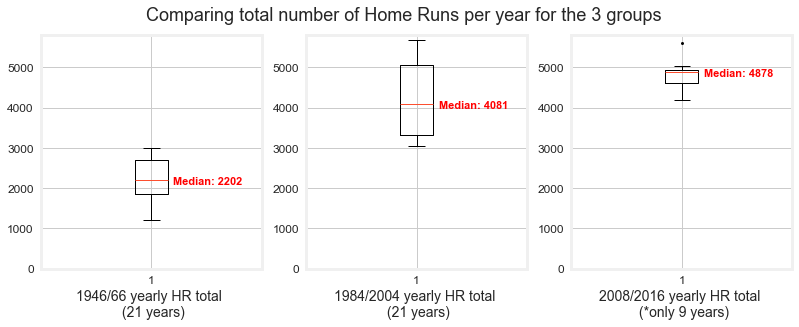

In [3203]:
# Create a boxplot fot total number of HR each year for the 3 groups
fig = plt.figure(figsize=(12,4), facecolor='w')
fig.suptitle('Comparing total number of Home Runs per year for the 3 groups', size=18)

ax = fig.add_subplot(1,3,1,facecolor='w')
plt.boxplot(bat_46_66['HR'], sym='k.')
plt.ylim(ymin=-1, ymax=5800)
plt.xlabel('1946/66 yearly HR total \n (21 years)', size=14)
plt.annotate("Median: " "%.0f" % bat_46_66['HR'].median(),
             xy=(1, 12), xytext=(1.1, 2102), color='#FF0000', size=11, fontweight='bold')

ax = fig.add_subplot(1,3,2,facecolor='w')
plt.boxplot(bat_84_2004['HR'], sym='k.')
plt.ylim(ymin=-1, ymax=5800)
plt.xlabel('1984/2004 yearly HR total \n (21 years)', size=14)
plt.annotate("Median: " "%.0f" % bat_84_2004['HR'].median(),
             xy=(1, 12), xytext=(1.1, 3981), color='#FF0000', size=11, fontweight='bold')

ax = fig.add_subplot(1,3,3,facecolor='w')
plt.boxplot(bat_post2008['HR'], sym='k.')
plt.ylim(ymin=-1, ymax=5800)
plt.xlabel('2008/2016 yearly HR total \n (*only 9 years)', size=14)
plt.annotate("Median: " "%.0f" % bat_post2008['HR'].median(),
             xy=(1, 12), xytext=(1.1, 4778), color='#FF0000', size=11, fontweight='bold')

 
plt.show()

In the bloxplot above we see no overlap between the 1946-1966 entire range and the 1984-2004 range. The maximum number of Home Runs per year for the 1946-1966 period is smaller than the minimum for the 1984-2004 period.
Comparing the 1984-2004 period with the smaller period ranging from 2008-2016 shows a different story. The median for the 2008-2016 period is higher (4878) than the median for the 1984-2004 period (4081). It is surprising to see this.

In [3207]:
# One-way ANOVA using Scipy
# Comparing total number of home runs each year between two groups: 46 to 66 and 84 to 2004.
print("Home Runs comparison 1946-1966 & 1984-2004:")
print(stats.f_oneway(bat_46_66['HR'], bat_84_2004['HR']))
print("Statistically significant at p < 0.001")
print("")
print("Hits comparison 1946-1966 & 1984-2004::")
# Comparing hits.
print(stats.f_oneway(bat_46_66['H'], bat_84_2004['H']))
print("Statistically significant at p < 0.001")
print("")
print("")
print("Home runs Max comparison 1946-1966 & 1984-2004:")
print(stats.f_oneway(bat_46_66_max['HR'], bat_84_2004_max['HR']))
print("Not statistically significant")
print("")
print("Hits max comparison 1946-1966 & 1984-2004:")
print(stats.f_oneway(bat_46_66_max['H'], bat_84_2004_max['H']))
print("Not statistically significant")
print("")
print("")
print("")
print("Home Runs comparison 1984-2004 & 2008-2016:")
print(stats.f_oneway(bat_post2008['HR'], bat_84_2004['HR']))
print("Not statistically significant")
print("")
print("Hits comparison 1984-2004 & 2008-2016:")
# Comparing hits.
print(stats.f_oneway(bat_post2008['H'], bat_84_2004['H']))
print("Not statistically significant")
print("")
print("")
print("Home runs Max comparison 1984-2004 & 2008-2016:")
print(stats.f_oneway(bat_post2008['HR'], bat_84_2004_max['HR']))
print("Not statistically significant")
print("")
print("Hits max comparison 1984-2004 & 2008-2016:")
print(stats.f_oneway(bat_post2008['H'], bat_84_2004_max['H']))
print("Not statistically significant")

Home Runs comparison 1946-1966 & 1984-2004:
F_onewayResult(statistic=82.754945121356457, pvalue=2.7502350088455824e-11)
Statistically significant at p < 0.001

Hits comparison 1946-1966 & 1984-2004::
F_onewayResult(statistic=234.86007822894544, pvalue=2.4522753126449804e-18)
Statistically significant at p < 0.001


Home runs Max comparison 1946-1966 & 1984-2004:
F_onewayResult(statistic=1.5234390992835212, pvalue=0.22430228685397841)
Not statistically significant

Hits max comparison 1946-1966 & 1984-2004:
F_onewayResult(statistic=2.5607208499574128, pvalue=0.11741833243662836)
Not statistically significant



Home Runs comparison 1984-2004 & 2008-2016:
F_onewayResult(statistic=2.8509362373667804, pvalue=0.10242946719187879)
Not statistically significant

Hits comparison 1984-2004 & 2008-2016:
F_onewayResult(statistic=3.8397102095027913, pvalue=0.060075855043486448)
Not statistically significant


Home runs Max comparison 1984-2004 & 2008-2016:
F_onewayResult(statistic=3233.55959613223

In [3357]:
# Testing a different method for the one-way ANOVA analysis.
# We get the same results, which is reassuring.
# http://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/

k = 2  # number of conditions
n = len(bat_84_2004.values) #Participants in each condition
N = len(bat_84_2004.values)*k # conditions times participants

DFbetween = k - 1
DFwithin = N - k
DFtotal = N - 1


bat_46_66['group']='sixties'
bat_84_2004['group']='nineties'
samples = bat_46_66.append(bat_84_2004)

# Statsmodels Ordinary Least Squares
mod = ols('HR ~ group',data=samples).fit()           
aov_table = sm.stats.anova_lm(mod, typ=2)
print (aov_table)

# As can be seen in the ANVOA table Statsmodels don’t provide an effect size.  
# To calculate eta squared we can use the sum of squares from the table.
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print("")
print("")
print('Eta squared: ' + str(esq_sm.round(2)))
print('67% of the variation is due to between-group differences.')
print('For the comparison between the 1946-1966 group & the 1984-2004 group.')

                sum_sq    df          F        PR(>F)
group     4.600309e+07   1.0  82.754945  2.750235e-11
Residual  2.223582e+07  40.0        NaN           NaN


Eta squared: 0.67
67% of the variation is due to between-group differences.
For the comparison between the 1946-1966 group & the 1984-2004 group.


In [3222]:
# Testing yet a third method. Statsmodels Ordinary Least Squares.
# I am not sure why this produces different F and p results.
results = sm.OLS(bat_46_66['HR'], bat_84_2004['HR']).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     HR   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     980.7
Date:                Mon, 26 Jun 2017   Prob (F-statistic):           1.81e-18
Time:                        16:04:27   Log-Likelihood:                -150.55
No. Observations:                  21   AIC:                             303.1
Df Residuals:                      20   BIC:                             304.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HR             0.5042      0.016     31.316      0.0

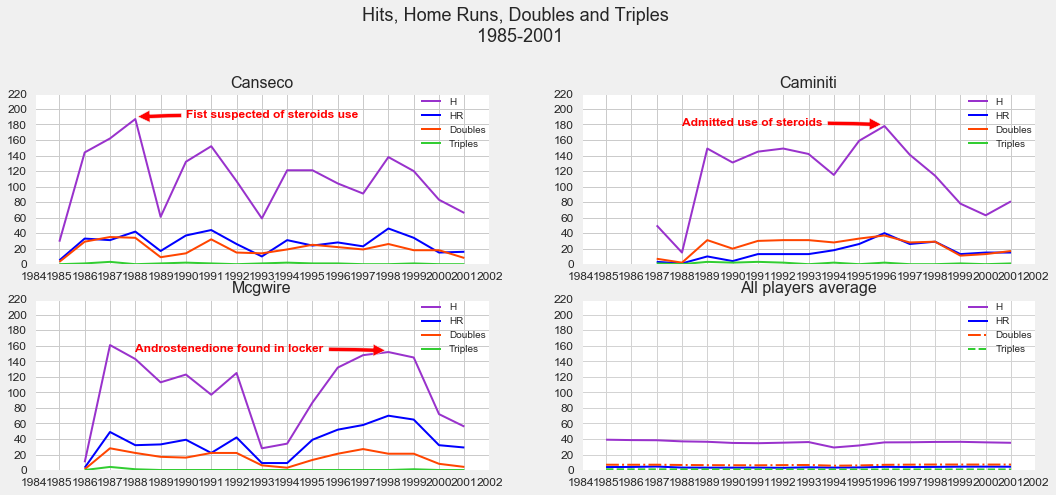

In [3360]:
# Plotting batting statistics for the 3 players and all players combined.
from matplotlib import style
style.use('fivethirtyeight')

# Setting the size of the figure a little bigger.
# In order to combine all the plots into one we need a subplot.
fig = plt.figure(figsize=(16,10))
fig.suptitle('Hits, Home Runs, Doubles and Triples \n 1985-2001', fontsize=18, y=1)

# Canseco
fig.add_subplot(3,2,1, facecolor='w') # two row, two column, first plot
plt.plot(bat_yp.loc[bat_yp['playerID'] =='cansejo01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='cansejo01']['H'], 
         color='#9932CC', label='H', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='cansejo01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='cansejo01']['HR'], 
         color='#0000FF', label='HR', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='cansejo01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='cansejo01']['2B'], 
         color='#FF4500', label='Doubles', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='cansejo01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='cansejo01']['3B'], 
         color='#32CD32', label='Triples', linewidth=2, ls='-')
plt.xlim(xmin=1986, xmax=2010)
plt.ylim(ymin=-1, ymax=220)
plt.locator_params(nbins=22)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.title("Canseco", Size=16)
plt.annotate('Fist suspected of steroids use', xy=(1988, 190), xytext=(1990, 188), color='#FF0000', 
            arrowprops=dict(facecolor='#FF0000', shrink=0.05), size=12, fontweight='bold')

plt.xlim(xmin=1984, xmax=2002)
plt.ylim(ymin=-1, ymax=220)
#increase number of ticks in x and y.
plt.locator_params(nbins=20)
# Place a legend to the right of the subplot.
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)

# Caminiti
fig.add_subplot(3,2,2, facecolor='w')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='caminke01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='caminke01']['H'], 
         color='#9932CC', label='H', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='caminke01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='caminke01']['HR'], 
         color='#0000FF', label='HR', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='caminke01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='caminke01']['2B'], 
         color='#FF4500', label='Doubles', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='caminke01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='caminke01']['3B'], 
         color='#32CD32', label='Triples', linewidth=2, ls='-')
plt.title("Caminiti", Size=16)
plt.annotate('Admitted use of steroids', xy=(1996, 180), xytext=(1988, 178), color='#FF0000', 
            arrowprops=dict(facecolor='#FF0000', shrink=0.05), size=12, fontweight='bold')

plt.xlim(xmin=1984, xmax=2002)
plt.ylim(ymin=-1, ymax=220)
plt.locator_params(nbins=20)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)

# McGwire
fig.add_subplot(3,2,3, facecolor='w')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='mcgwima01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='mcgwima01']['H'], 
         color='#9932CC', label='H', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='mcgwima01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='mcgwima01']['HR'], 
         color='#0000FF', label='HR', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='mcgwima01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='mcgwima01']['2B'], 
         color='#FF4500', label='Doubles', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='mcgwima01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='mcgwima01']['3B'], 
         color='#32CD32', label='Triples', linewidth=2, ls='-')
plt.title("Mcgwire", Size=16)
plt.annotate('Androstenedione found in locker', xy=(1998, 154), xytext=(1988, 152), color='#FF0000', 
            arrowprops=dict(facecolor='#FF0000', shrink=0.05), size=12, fontweight='bold')

plt.xlim(xmin=1984, xmax=2002)
plt.ylim(ymin=-1, ymax=220)
plt.locator_params(nbins=20)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)


# All
fig.add_subplot(3,2,4, facecolor='w')
plt.plot(all_players_avg['yearID'], all_players_avg['H'], color='#9932CC', label='H', linewidth=2, ls='-')
plt.plot(all_players_avg['yearID'], all_players_avg['HR'], color='#0000FF', label='HR', linewidth=2, ls='-')
plt.plot(all_players_avg['yearID'], all_players_avg['2B'], color='#FF4500', label='Doubles', linewidth=2, ls='-.')
plt.plot(all_players_avg['yearID'], all_players_avg['3B'], color='#32CD32', label='Triples', linewidth=2, ls='--')
plt.title("All players average", Size=16)
plt.grid(color='#D3D3D3')
plt.xlim(xmin=1984, xmax=2002)
plt.ylim(ymin=-1, ymax=220)
plt.locator_params(nbins=20)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)

plt.show()

In the above charts we see that all 3 of the key players (Canseco, Caminiti and McGwire) have a few ups and downs in performance over the years. All 3 players have performance spikes corresponding with suspected or confirmed use of PES. Canseco in 1988, Caminiti in 1996 and McGwire in 1998. In the cases of Canseco and McGwire we see a few ups and downs in Home Runs. For Caminiti, there is a clear trend of increasing Home Run performance up to the peak in 1996. He declared that he believed PES was the reason why he performed so well in 1996.

Caminiti declared in 2002 that "at least half" of MLB players were using PES. This makes the analysis very difficult as it is hard to know who are the players who used PES versus the ones that did not.

I am curious as to wether non PES users have more consistent performance. We will plot a few more confirmed PES users and a few players from the 60s, who are less likely to have consumed PES.

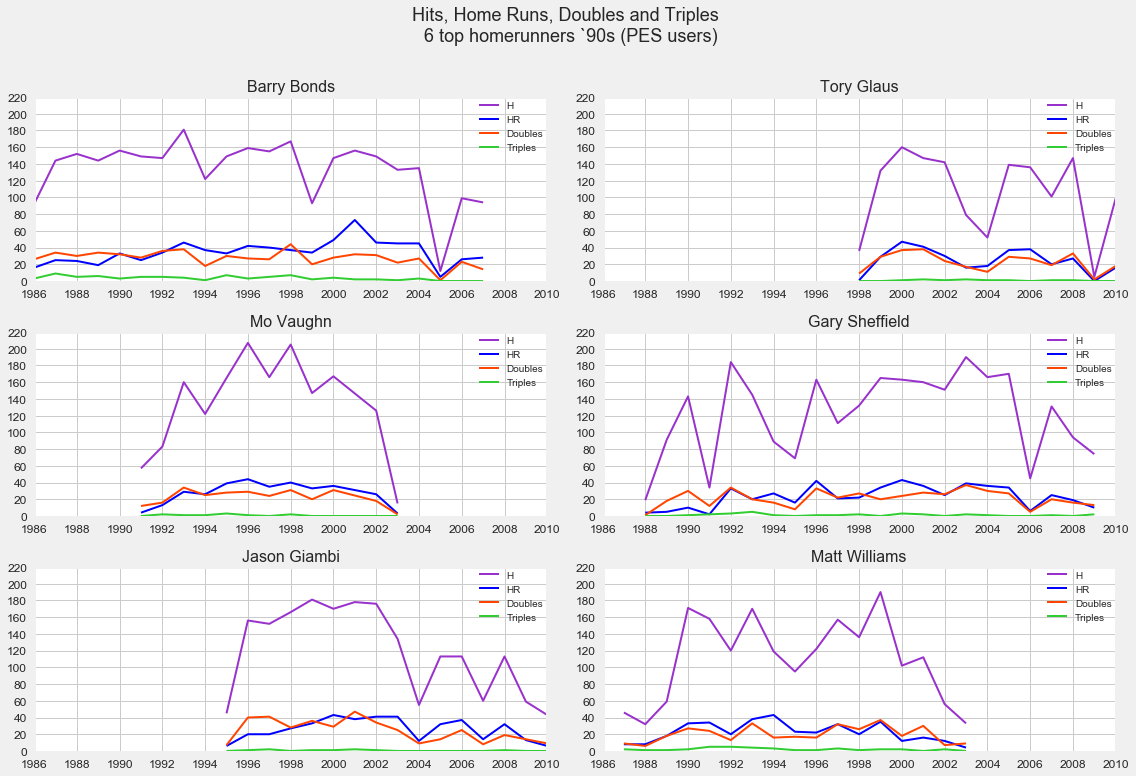

In [3361]:
# Plotting a few more top PES players. Can we see any pattern?
fig = plt.figure(figsize=(16,10))
fig.suptitle('Hits, Home Runs, Doubles and Triples \n 6 top homerunners `90s (PES users)', fontsize=18, y=1.08)


fig.add_subplot(3,2,1, facecolor='w')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='bondsba01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='bondsba01']['H'], 
         color='#9932CC', label='H', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='bondsba01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='bondsba01']['HR'], 
         color='#0000FF', label='HR', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='bondsba01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='bondsba01']['2B'], 
         color='#FF4500', label='Doubles', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='bondsba01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='bondsba01']['3B'], 
         color='#32CD32', label='Triples', linewidth=2, ls='-')
plt.xlim(xmin=1986, xmax=2010)
plt.ylim(ymin=-1, ymax=220)
plt.locator_params(nbins=22)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.title("Barry Bonds", Size=16)

fig.add_subplot(3,2,2, facecolor='w')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='glaustr01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='glaustr01']['H'], 
         color='#9932CC', label='H', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='glaustr01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='glaustr01']['HR'], 
         color='#0000FF', label='HR', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='glaustr01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='glaustr01']['2B'], 
         color='#FF4500', label='Doubles', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='glaustr01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='glaustr01']['3B'], 
         color='#32CD32', label='Triples', linewidth=2, ls='-')
plt.xlim(xmin=1986, xmax=2010)
plt.ylim(ymin=-1, ymax=220)
plt.locator_params(nbins=22)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.title("Tory Glaus", Size=16)

fig.add_subplot(3,2,3, facecolor='w')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='vaughmo01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='vaughmo01']['H'], 
         color='#9932CC', label='H', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='vaughmo01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='vaughmo01']['HR'], 
         color='#0000FF', label='HR', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='vaughmo01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='vaughmo01']['2B'], 
         color='#FF4500', label='Doubles', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='vaughmo01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='vaughmo01']['3B'], 
         color='#32CD32', label='Triples', linewidth=2, ls='-')
plt.xlim(xmin=1986, xmax=2010)
plt.ylim(ymin=-1, ymax=220)
plt.locator_params(nbins=22)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.title("Mo Vaughn", Size=16)

fig.add_subplot(3,2,4, facecolor='w')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='sheffga01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='sheffga01']['H'], 
         color='#9932CC', label='H', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='sheffga01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='sheffga01']['HR'], 
         color='#0000FF', label='HR', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='sheffga01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='sheffga01']['2B'], 
         color='#FF4500', label='Doubles', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='sheffga01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='sheffga01']['3B'], 
         color='#32CD32', label='Triples', linewidth=2, ls='-')
plt.xlim(xmin=1986, xmax=2010)
plt.ylim(ymin=-1, ymax=220)
plt.locator_params(nbins=22)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.title("Gary Sheffield", Size=16)

fig.add_subplot(3,2,5, facecolor='w')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='giambja01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='giambja01']['H'], 
         color='#9932CC', label='H', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='giambja01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='giambja01']['HR'], 
         color='#0000FF', label='HR', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='giambja01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='giambja01']['2B'], 
         color='#FF4500', label='Doubles', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='giambja01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='giambja01']['3B'], 
         color='#32CD32', label='Triples', linewidth=2, ls='-')
plt.xlim(xmin=1986, xmax=2010)
plt.ylim(ymin=-1, ymax=220)
plt.locator_params(nbins=22)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.title("Jason Giambi", Size=16)

fig.add_subplot(3,2,6, facecolor='w')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='willima04']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='willima04']['H'], 
         color='#9932CC', label='H', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='willima04']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='willima04']['HR'], 
         color='#0000FF', label='HR', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='willima04']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='willima04']['2B'], 
         color='#FF4500', label='Doubles', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='willima04']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='willima04']['3B'], 
         color='#32CD32', label='Triples', linewidth=2, ls='-')
plt.xlim(xmin=1986, xmax=2010)
plt.ylim(ymin=-1, ymax=220)
plt.locator_params(nbins=22)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.title("Matt Williams", Size=16)

fig.tight_layout()
plt.show()

It is very difficult to spot particular trends. Players have many ups and downs in performance and their carreer durations vary. Mo Vaughn's career lasted 12 years while Barry Bonds' career lasted 21 years.

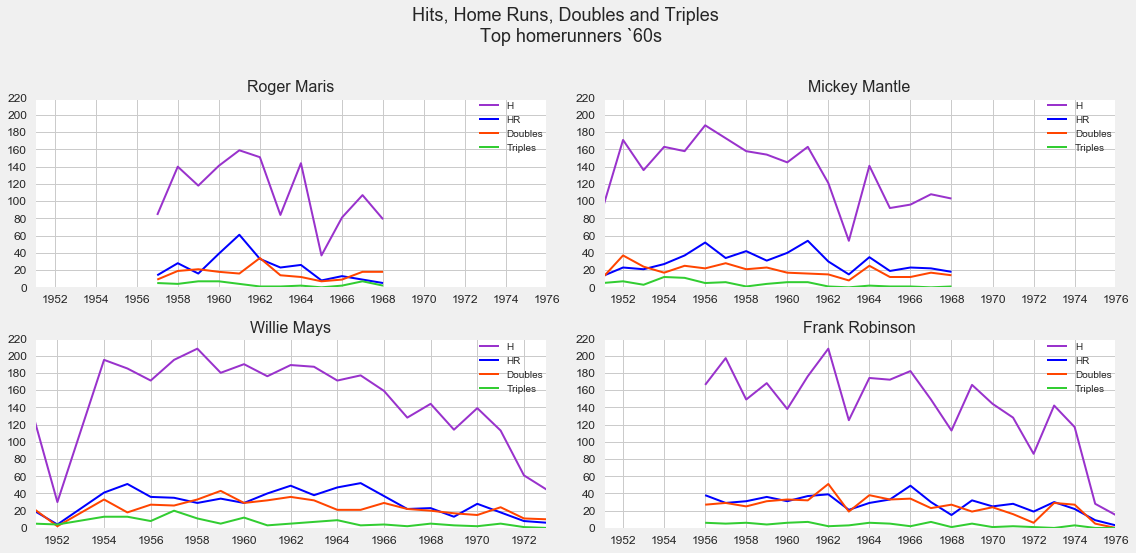

In [3363]:
# Plotting a few more players from the 60s.
fig = plt.figure(figsize=(16,10))
fig.suptitle('Hits, Home Runs, Doubles and Triples \n Top homerunners `60s', fontsize=18, y=1.08)

fig.add_subplot(3,2,1, facecolor='w')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='marisro01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='marisro01']['H'], 
         color='#9932CC', label='H', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='marisro01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='marisro01']['HR'], 
         color='#0000FF', label='HR', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='marisro01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='marisro01']['2B'], 
         color='#FF4500', label='Doubles', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='marisro01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='marisro01']['3B'], 
         color='#32CD32', label='Triples', linewidth=2, ls='-')
plt.xlim(xmin=1951, xmax=1976)
plt.ylim(ymin=-1, ymax=220)
plt.locator_params(nbins=18)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.title("Roger Maris", Size=16)

fig.add_subplot(3,2,2, facecolor='w')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='mantlmi01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='mantlmi01']['H'], 
         color='#9932CC', label='H', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='mantlmi01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='mantlmi01']['HR'], 
         color='#0000FF', label='HR', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='mantlmi01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='mantlmi01']['2B'], 
         color='#FF4500', label='Doubles', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='mantlmi01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='mantlmi01']['3B'], 
         color='#32CD32', label='Triples', linewidth=2, ls='-')
plt.xlim(xmin=1951, xmax=1976)
plt.ylim(ymin=-1, ymax=220)
plt.locator_params(nbins=18)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.title("Mickey Mantle", Size=16)

fig.add_subplot(3,2,3, facecolor='w')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='mayswi01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='mayswi01']['H'], 
         color='#9932CC', label='H', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='mayswi01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='mayswi01']['HR'], 
         color='#0000FF', label='HR', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='mayswi01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='mayswi01']['2B'], 
         color='#FF4500', label='Doubles', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='mayswi01']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='mayswi01']['3B'], 
         color='#32CD32', label='Triples', linewidth=2, ls='-')
plt.xlim(xmin=1951, xmax=1973)
plt.ylim(ymin=-1, ymax=220)
plt.locator_params(nbins=18)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.title("Willie Mays", Size=16)

fig.add_subplot(3,2,4, facecolor='w')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='robinfr02']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='robinfr02']['H'], 
         color='#9932CC', label='H', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='robinfr02']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='robinfr02']['HR'], 
         color='#0000FF', label='HR', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='robinfr02']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='robinfr02']['2B'], 
         color='#FF4500', label='Doubles', linewidth=2, ls='-')
plt.plot(bat_yp.loc[bat_yp['playerID'] =='robinfr02']['yearID'], 
         bat_yp.loc[bat_yp['playerID'] =='robinfr02']['3B'], 
         color='#32CD32', label='Triples', linewidth=2, ls='-')
plt.xlim(xmin=1951, xmax=1976)
plt.ylim(ymin=-1, ymax=220)
plt.locator_params(nbins=18)
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
plt.title("Frank Robinson", Size=16)

fig.tight_layout()
plt.show()

There are no obvious differences between these players from the 60s and players from the steroid era (plotted above). Roger Maris' career only lasted 11 years while Willie Mays' career lasted 22 years. Roger Maris had a peak of HR in 1961 and then a decline. Willie Mays on the other hand had several ups and downs. We can't say that there are clear differences between the patterns of these players and the players of the steroid era. 

In [3289]:
# HR mean and std, and HR/H ratio for the 3 players compared to 
# the 1946-1966 time frame
# the 1984-2004 time frame
# since 2008

print("Canseco HR mean: " "%.2f" % bat_yp.loc[bat_yp['playerID'] =='cansejo01']['HR'].mean())
print("Canseco HR std: " "%.2f" % bat_yp.loc[bat_yp['playerID'] =='cansejo01']['HR'].std())
print("Canseco HR per H ratio: " "%.2f" % (canseco_b_sum['HR'].sum()/canseco_b_sum['H'].sum()))
print('')
print("Caminiti HR mean: " "%.2f" % bat_yp.loc[bat_yp['playerID'] =='caminke01']['HR'].mean())
print("Caminiti HR std: " "%.2f" %  bat_yp.loc[bat_yp['playerID'] =='caminke01']['HR'].std())
print("Canseco HR per H ratio: " "%.2f" % (caminiti_b_sum['HR'].sum()/caminiti_b_sum['H'].sum()))
print('')
print("McGwire HR mean: " "%.2f" % bat_yp.loc[bat_yp['playerID'] =='mcgwima01']['HR'].mean())
print("McGwire HR std: " "%.2f" % bat_yp.loc[bat_yp['playerID'] =='mcgwima01']['HR'].std())
print("Canseco ratio of HR per H: " "%.2f" % (mcgwire_b_sum['HR'].sum()/mcgwire_b_sum['H'].sum()))
print('')
print('')
print("All players 1946 to 1966 HR mean: " "%.2f" % 
      (bat_yp[(bat_yp['yearID'] > 1945) & (bat_yp['yearID'] < 1967)])['HR'].mean())
print("All players 1946 to 1966 HR std: " "%.2f" % 
     (bat_yp[(bat_yp['yearID'] > 1945) & (bat_yp['yearID'] < 1967)])['HR'].std())
print ("All players 1946 to 1966 HR per H ratio: " "%.2f" % 
      ((bat_yp[(bat_yp['yearID'] > 1945) & (bat_yp['yearID'] < 1967)])['HR'].sum()/
                (bat_yp[(bat_yp['yearID'] > 1945) & (bat_yp['yearID'] < 1967)])['H'].sum()))
print('')
print('')
print("All players 1984 to 2004 HR mean: " "%.2f" % 
      (bat_yp[(bat_yp['yearID'] > 1983) & (bat_yp['yearID'] < 2005)])['HR'].mean())
print("All players 1984 to 2004 HR std: " "%.2f" % 
     (bat_yp[(bat_yp['yearID'] > 1983) & (bat_yp['yearID'] < 2005)])['HR'].std())
print ("All players 1984 to 2004 HR per H ratio: " "%.2f" % 
      ((bat_yp[(bat_yp['yearID'] > 1983) & (bat_yp['yearID'] < 2005)])['HR'].sum()/
                (bat_yp[(bat_yp['yearID'] > 1983) & (bat_yp['yearID'] < 2005)])['H'].sum()))
print('')
print('')
print("All players 2008 to 2016 HR mean: " "%.2f" % bat_yp[bat_yp['yearID'] > 2007]['HR'].mean())
print("All players 2008 to 2016 HR std: " "%.2f" % bat_yp[bat_yp['yearID'] > 2007]['HR'].std())
print ("All players 2008 to 2016 HR per H ratio: " "%.2f" % 
      (bat_yp[bat_yp['yearID'] > 2007]['HR'].sum()/bat_yp[bat_yp['yearID'] > 2007]['H'].sum()))

Canseco HR mean: 27.18
Canseco HR std: 11.88
Canseco HR per H ratio: 0.25

Caminiti HR mean: 15.93
Caminiti HR std: 10.56
Canseco HR per H ratio: 0.14

McGwire HR mean: 36.44
McGwire HR std: 19.65
Canseco ratio of HR per H: 0.36


All players 1946 to 1966 HR mean: 3.65
All players 1946 to 1966 HR std: 7.18
All players 1946 to 1966 HR per H ratio: 0.09


All players 1984 to 2004 HR mean: 3.92
All players 1984 to 2004 HR std: 7.77
All players 1984 to 2004 HR per H ratio: 0.11


All players 2008 to 2016 HR mean: 3.70
All players 2008 to 2016 HR std: 7.36
All players 2008 to 2016 HR per H ratio: 0.11


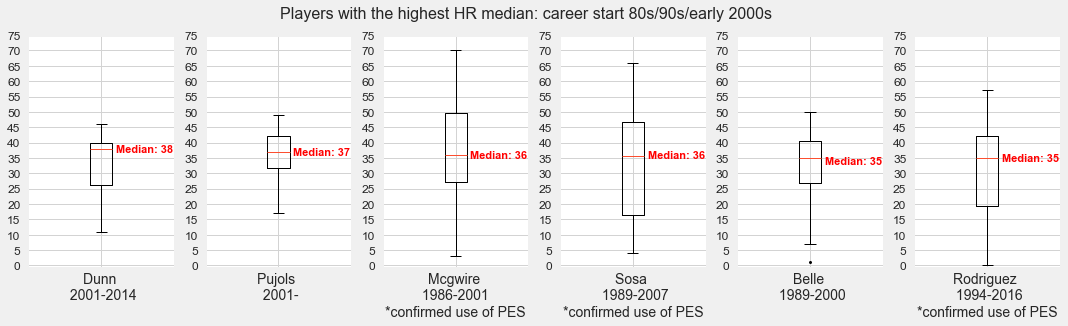

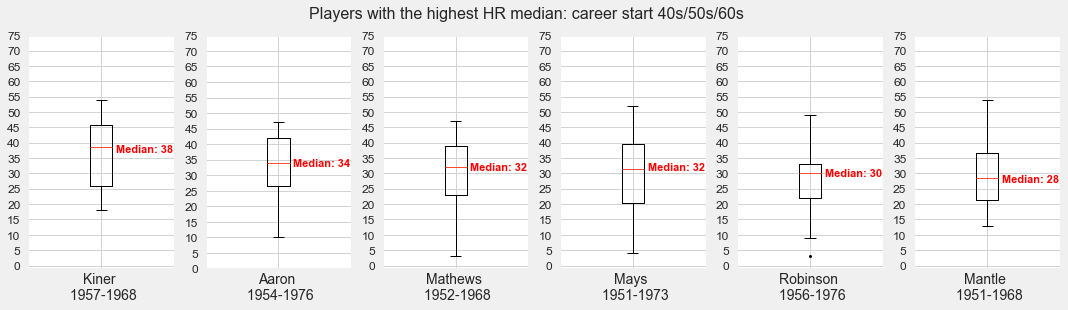

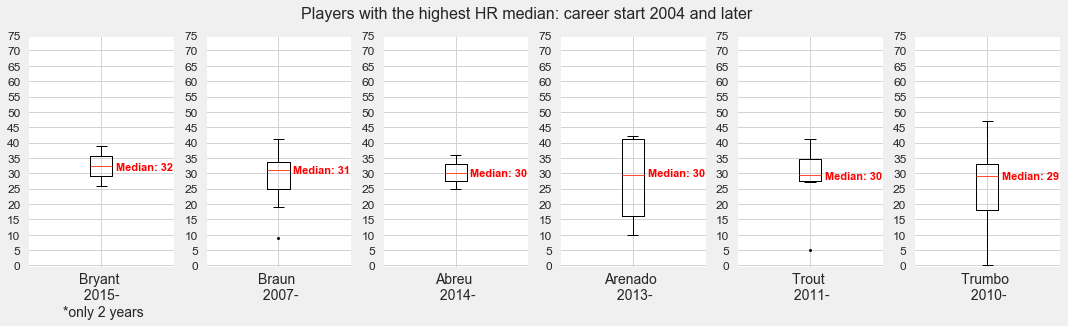

In [3378]:
# Boxplots for several players in the 90s, 60s and 2010s. 
# We want to compare minimum, first quartile, median, third quartile and maximum.
fig = plt.figure(figsize=(16.5,4))
fig.suptitle("Players with the highest HR median: career start 80s/90s/early 2000s", fontsize=16)


# Dunn's boxplot 
fig.add_subplot(1,6,1, facecolor='w') # one row, four column, first plot
plt.boxplot(bat_yp.loc[bat_yp['playerID'] =='dunnad01']['HR'].reset_index(drop=True), sym='k.')
plt.ylim(ymin=-1, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Dunn \n 2001-2014', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % bat_yp.loc[bat_yp['playerID'] =='dunnad01']['HR'].median(),
             xy=(1, 27), xytext=(1.1, 37), color='#FF0000', size=11, fontweight='bold')

# Pujols' boxplot 
fig.add_subplot(1,6,2, facecolor='w') # one row, four column, first plot
plt.boxplot(bat_yp.loc[bat_yp['playerID'] =='pujolal01']['HR'].reset_index(drop=True), sym='k.')
plt.ylim(ymin=-1, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Pujols \n 2001-', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % bat_yp.loc[bat_yp['playerID'] =='pujolal01']['HR'].median(),
             xy=(1, 27), xytext=(1.1, 36), color='#FF0000', size=11, fontweight='bold')

# McGwire's boxplot
fig.add_subplot(1,6,3, facecolor='w')
plt.boxplot(mcgwire_b_sum['HR'], sym='k.')
plt.ylim(ymin=-1, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Mcgwire \n 1986-2001 \n*confirmed use of PES', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % mcgwire_b_sum['HR'].median(),
             xy=(1, 35.5), xytext=(1.1, 35), color='#FF0000', size=11, fontweight='bold')

# Sosa's boxplot 
fig.add_subplot(1,6,4, facecolor='w') # one row, four column, first plot
plt.boxplot(bat_yp.loc[bat_yp['playerID'] =='sosasa01']['HR'].reset_index(drop=True), sym='k.')
plt.ylim(ymin=-1, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Sosa \n 1989-2007\n*confirmed use of PES', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % bat_yp.loc[bat_yp['playerID'] =='sosasa01']['HR'].median(),
             xy=(1, 27), xytext=(1.1, 35), color='#FF0000', size=11, fontweight='bold')

# Belle's boxplot
fig.add_subplot(1,6,5, facecolor='w') # one row, four column, first plot
plt.boxplot(bat_yp.loc[bat_yp['playerID'] =='belleal01']['HR'].reset_index(drop=True), sym='k.')
plt.ylim(ymin=-1, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Belle \n 1989-2000', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % bat_yp.loc[bat_yp['playerID'] =='belleal01']['HR'].median(),
             xy=(1, 27), xytext=(1.1, 33), color='#FF0000', size=11, fontweight='bold')

# Rodriguez' boxplot 
fig.add_subplot(1,6,6, facecolor='w')
plt.boxplot(bat_yp.loc[bat_yp['playerID'] =='rodrial01']['HR'].reset_index(drop=True), sym='k.')
plt.ylim(ymin=-1, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Rodriguez \n 1994-2016\n*confirmed use of PES', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % bat_yp.loc[bat_yp['playerID'] =='rodrial01']['HR'].median(),
             xy=(1, 27), xytext=(1.1, 34), color='#FF0000', size=11, fontweight='bold')




# And now for the 60s
fig = plt.figure(figsize=(16.5,4))
fig.suptitle("Players with the highest HR median: career start 40s/50s/60s", fontsize=16)

# Kiner's boxplot
fig.add_subplot(1,6,1, facecolor='w') # one row, four column, first plot
plt.boxplot(bat_yp.loc[bat_yp['playerID'] =='kinerra01']['HR'].reset_index(drop=True), sym='k.')
plt.ylim(ymin=-1, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Kiner \n 1957-1968', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % bat_yp.loc[bat_yp['playerID'] =='kinerra01']['HR'].median(),
             xy=(1, 27), xytext=(1.1, 37), color='#FF0000', size=11, fontweight='bold')

# Aaron's boxplot 
fig.add_subplot(1,6,2, facecolor='w') 
plt.boxplot(bat_yp.loc[bat_yp['playerID'] =='aaronha01']['HR'].reset_index(drop=True), sym='k.')
plt.ylim(ymin=0, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Aaron \n 1954-1976', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % bat_yp.loc[bat_yp['playerID'] =='aaronha01']['HR'].median(),
             xy=(1, 12), xytext=(1.1, 33), color='#FF0000', size=11, fontweight='bold')

# Mathews' boxplot 
fig.add_subplot(1,6,3, facecolor='w') 
plt.boxplot(bat_yp.loc[bat_yp['playerID'] =='matheed01']['HR'].reset_index(drop=True), sym='k.')
plt.ylim(ymin=-1, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Mathews \n 1952-1968', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % bat_yp.loc[bat_yp['playerID'] =='matheed01']['HR'].median(),
             xy=(1, 12), xytext=(1.1, 31), color='#FF0000', size=11, fontweight='bold')

# Mays' boxplot 
fig.add_subplot(1,6,4, facecolor='w') 
plt.boxplot(bat_yp.loc[bat_yp['playerID'] =='mayswi01']['HR'].reset_index(drop=True), sym='k.')
plt.ylim(ymin=-1, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Mays \n 1951-1973', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % bat_yp.loc[bat_yp['playerID'] =='mayswi01']['HR'].median(),
             xy=(1, 12), xytext=(1.1, 31), color='#FF0000', size=11, fontweight='bold')

# Robinson's boxplot 
fig.add_subplot(1,6,5, facecolor='w') 
plt.boxplot(bat_yp.loc[bat_yp['playerID'] =='robinfr02']['HR'].reset_index(drop=True), sym='k.')
plt.ylim(ymin=-1, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Robinson \n 1956-1976', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % bat_yp.loc[bat_yp['playerID'] =='robinfr02']['HR'].median(),
             xy=(1, 12), xytext=(1.1, 29), color='#FF0000', size=11, fontweight='bold')

# Mantle's boxplot 
fig.add_subplot(1,6,6, facecolor='w') 
plt.boxplot(bat_yp.loc[bat_yp['playerID'] =='mantlmi01']['HR'].reset_index(drop=True), sym='k.')
plt.ylim(ymin=-1, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Mantle \n 1951-1968', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % bat_yp.loc[bat_yp['playerID'] =='mantlmi01']['HR'].median(),
             xy=(1, 12), xytext=(1.1, 27), color='#FF0000', size=11, fontweight='bold')




# And now for post 2004
fig = plt.figure(figsize=(16.5,4))
fig.suptitle("Players with the highest HR median: career start 2004 and later", fontsize=16)


# Bryant's boxplot 
fig.add_subplot(1,6,1, facecolor='w') 
plt.boxplot(bat_yp.loc[bat_yp['playerID'] =='bryankr01']['HR'].reset_index(drop=True), sym='k.')
plt.ylim(ymin=-1, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Bryant \n 2015- \n *only 2 years', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % bat_yp.loc[bat_yp['playerID'] =='bryankr01']['HR'].median(),
             xy=(1, 12), xytext=(1.1, 31), color='#FF0000', size=11, fontweight='bold')

# Braun's boxplot 
fig.add_subplot(1,6,2, facecolor='w') 
plt.boxplot(bat_yp.loc[bat_yp['playerID'] =='braunry02']['HR'].reset_index(drop=True), sym='k.')
plt.ylim(ymin=-1, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Braun \n 2007-', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % bat_yp.loc[bat_yp['playerID'] =='braunry02']['HR'].median(),
             xy=(1, 12), xytext=(1.1, 30), color='#FF0000', size=11, fontweight='bold')

# Abreu's boxplot 
fig.add_subplot(1,6,3, facecolor='w') 
plt.boxplot(bat_yp.loc[bat_yp['playerID'] =='abreujo02']['HR'].reset_index(drop=True), sym='k.')
plt.ylim(ymin=-1, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Abreu \n 2014-', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % bat_yp.loc[bat_yp['playerID'] =='abreujo02']['HR'].median(),
             xy=(1, 12), xytext=(1.1, 29), color='#FF0000', size=11, fontweight='bold')

# Arenado's boxplot 
fig.add_subplot(1,6,4, facecolor='w') 
plt.boxplot(bat_yp.loc[bat_yp['playerID'] =='arenano01']['HR'].reset_index(drop=True), sym='k.')
plt.ylim(ymin=-1, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Arenado \n 2013-', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % bat_yp.loc[bat_yp['playerID'] =='arenano01']['HR'].median(),
             xy=(1, 12), xytext=(1.1, 29), color='#FF0000', size=11, fontweight='bold')


# Trout's boxplot 
fig.add_subplot(1,6,5, facecolor='w') 
plt.boxplot(bat_yp.loc[bat_yp['playerID'] =='troutmi01']['HR'].reset_index(drop=True), sym='k.')
plt.ylim(ymin=-1, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Trout \n 2011-', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % bat_yp.loc[bat_yp['playerID'] =='troutmi01']['HR'].median(),
             xy=(1, 12), xytext=(1.1, 28), color='#FF0000', size=11, fontweight='bold')


# Trumbo's boxplot 
fig.add_subplot(1,6,6, facecolor='w') 
plt.boxplot(bat_yp.loc[bat_yp['playerID'] =='trumbma01']['HR'].reset_index(drop=True), sym='k.')
plt.ylim(ymin=-1, ymax=75)
plt.tick_params(axis='both', left='on', top='off', right='off', 
                bottom='off', labelleft='on', labeltop='off', labelright='off', labelbottom='off')
plt.xlabel('Trumbo \n 2010-', size=14)
plt.grid(color='#D3D3D3')
plt.locator_params(nbins=20)
plt.annotate("Median: " "%.0f" % bat_yp.loc[bat_yp['playerID'] =='trumbma01']['HR'].median(),
             xy=(1, 12), xytext=(1.1, 28), color='#FF0000', size=11, fontweight='bold')

plt.show()

In the boxplots we see that in the 90s and early 2000s (before PES testing was enforced) the top 6 player's HR median was between 35 and 38. McGwire, Sosa and Rodriguez are confirmed PES users. <sup>1 5 6</sup>
The 6 players with the highest HR median whose careers started in the 40s/50s and 60s had median HR values of 38, 34, 32, 32, 30 and 28.
The top 6 players whose careers started in 2004 or later (the post steroid test era) have mean HR values hovering around 30. It is interesting to consider this as we see the Home Run rebound of 2016. If the trend continues we should see an increase in median HR values for these and other contemporary players.

In [3386]:
# Looking at max post 2008
bat_post2008_max.sort_values(['HR'], ascending=False).head(5)

,index,yearID,playerID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
2,139,2010,zumayjo01,6,162,680,115,214,49,14,54,126.0,68.0,18.0,114,211.0,38.0,25.0,18.0,12.0,32.0
5,142,2013,zuninmi01,10,162,667,126,199,55,11,53,138.0,52.0,15.0,135,212.0,27.0,26.0,16.0,12.0,31.0
0,137,2008,zumayjo01,6,163,688,125,213,54,19,48,146.0,68.0,16.0,122,204.0,34.0,27.0,19.0,11.0,32.0
1,138,2009,zumayjo01,6,162,682,124,225,56,13,47,141.0,70.0,17.0,119,223.0,44.0,24.0,20.0,11.0,29.0
7,144,2015,zychto01,6,162,638,122,205,45,15,47,130.0,58.0,20.0,143,208.0,29.0,30.0,14.0,11.0,28.0


## Conclusion

We visualized baseball data with the goal of identifying patterns present in Performance Enhanced Substance users. The height of the steroid era was between the late 80s and the early 2000s. We present plots and boxplots for the three players at the center of the scandal, Canseco, Caminiti and McGwire and we compare the data to other players who are known to or have been linked to the consumption of PES. We also compare these 3 key players to players who are less likely to have consumed PES. We did not observe any obvious trends that identify PES players from non-confirmed PES players.

We also visualized Home Run trends over the history of baseball. It is worth noting that the peak in Home Runs of 2016 is peculiar. Although there has been a downward trend in Home Runs after the testing period of 2004, there was a pickup in 2016 to levels which are very close to the height of the steroid era in 2000. When we run a one-way ANOVA test for two groups: total number of yearly Home Runs during the 1946-1966 time frame and the total number of yearly Home Runs during the 1984-2004 time frame, we see that there is a statistical significant difference at p < 0.001. We can't say that the statistical difference is attributabe to the use of PES exclusively but it is reasonable to believe that the use of PES played a role. It is surprising to see that there is no statistically significant difference when we compare the 1984-2004 time frame with the post 2008 timeframe (*note, these two groups are of unequal size, making the comparison more unreliable). It is possible that other factors explain the peak of Home Runs in 2016, one of them was the introduction of Statcast, a system of high-resolution cameras that measures a variety of statistics not measured before.<sup>11</sup> The system is being used to make strategy decisions. It is also interesting to note that the max value of Home Runs has not reached steroid era levels. The max during the 2008 to 2016 period was 54 Home Runs by Jose Zumaya in 2010, while during the 1984 to 2004 period the max was 71 by Barry Bonds in 2001. The median number of Home Runs post 2008 is also lower. It hovers in the 30s for the 6 players with the heighest median. That was not the case during the 1984-2004 period in which the 6 players with the heighest HR median had medians between 35 and 38.

It will be interesting to see what happens within the next 5 years. It posible that the new new technology coupled with statistical methods are helping bring back the excitment of Home Runs, but it would be peculiar to go back to the same levels as we saw in the steroid era.

## References

1. Mitchell, George J. Report to the Commissioner of Baseball of an independent investigation into the illegal use of steroids and other Performance Enhancing Substances by players in Major League Baseball. December 13, 2007. Retrieved from:
http://files.mlb.com/mitchrpt.pdf

2. Erickson, Brandon J, et al., The Effect of the Steroid Era on Major League Baseball Hitters: Did It Enhance Hitting?, Journal of Sports Medicine & Doping Studies, May 31, 2015. Retrived from: https://www.omicsonline.org/open-access/the-effect-of-the-steroid-era-on-major-league-baseball-hitters-did-it-enhance-hitting-2161-0673-1000161.php?aid=53354

3. Historical Timeline, History of Performance, Enhancing Drugs in Sports, procon.org website. Retrieved from:
http://sportsanddrugs.procon.org/view.timeline.php?timelineID=000017

4. Kanayama, Gen et al., “Anabolic-Androgenic Steroid Dependence: An Emerging Disorder.” Addiction (Abingdon, England) 104.12 (2009): 1966–1978. PMC. Web. 21 June 2017.

5. Godfrey, George, baseballssteroidera website. Retrieved from: http://www.baseballssteroidera.com/

6. MLB drug suspensions http://sports.newsday.com/long-island/data/baseball/drug-suspensions/
7. Greenberg, Neil. Baseball just saw its biggest home run surge since the steroids era. Here’s why. Fancy Stats, The Washington Post. March 8, 2016. Retrieved from: https://www.washingtonpost.com/news/fancy-stats/wp/2016/03/07/the-perfect-storm-that-created-baseballs-biggest-home-run-surge-since-the-steroid-era/?utm_term=.e66991c6a75e
8. Greenberg, Neil. 
The statistical revelation that has MLB hitters bombing more home runs than the steroid era. Fancy Stats, The Washington Post. June 1, 20017. Retrieved from: https://www.washingtonpost.com/news/fancy-stats/wp/2017/06/01/mlb-home-run-spike-shows-statcast-science-is-more-potent-than-steroids/?utm_term=.11ff0a410b27
9. Verducci, Tom. The numbers—and the truth—about baseball's PED problem and why it may never go away. MLB, Sports Illustrated. May 16th, 2017. Retrieved from: https://www.si.com/mlb/2017/05/16/ped-suspensions-home-run-rate
10. Green, Christopher. Baseball’s First Power Surge: Home Runs in the Late 19th-Century Major Leagues. Baseball Research Journal, Fall 2011. Retrieved from:  http://sabr.org/research/baseball-s-first-power-surge-home-runs-late-19th-century-major-leagues
11. Statcast. MLB.com website. Retrieved from: http://m.mlb.com/glossary/statcast